In [6]:
# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations


# LOADING THE DATASET
import gdown

# Convert to a direct download link (Excel format)
download_url = "https://docs.google.com/spreadsheets/d/1tjx2ifyUsAAB-yxxuvTIjXNmkomA9OzW/export?format=xlsx"

# Output filename
output_file = "downloaded_file.xlsx"

# Download the file
gdown.download(download_url, output=output_file, quiet=False)

# === Step 2: Read Excel File ===
data = pd.read_excel(output_file)

# Create a copy of the data
df = data.copy()



# Display column names
df.columns
df

Downloading...
From: https://docs.google.com/spreadsheets/d/1tjx2ifyUsAAB-yxxuvTIjXNmkomA9OzW/export?format=xlsx
To: /content/downloaded_file.xlsx
16.9kB [00:00, 15.1MB/s]


,Year,Month,Day,Inflation
0,2000,1,31,0.329139
1,2000,2,28,1.940367
2,2000,3,31,4.469678
3,2000,4,30,3.672022
4,2000,5,31,2.382412
...,...,...,...,...
298,2024,11,30,-2.068252
299,2024,12,31,-1.742696
300,2025,1,31,-4.035874
301,2025,2,28,-4.187438


In [7]:
df.columns
# Create a new 'Date' column by combining 'Year', 'Month', and 'Day'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
# Drop the 'Year', 'Month', and 'Day' columns
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)

            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
DatetimeIndex(['2000-01-31', '2000-02-28', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=303, freq=None)


In [8]:
df

,Inflation
Date,
2000-01-31,0.329139
2000-02-28,1.940367
2000-03-31,4.469678
2000-04-30,3.672022
2000-05-31,2.382412
...,...
2024-11-30,-2.068252
2024-12-31,-1.742696
2025-01-31,-4.035874


In [9]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your time series data is in 'df' and it's in a column called 'value'
# Splitting the data into 70% for training and 30% for testing
train_size = int(len(df) * 0.9)
train, test = df[:train_size], df[train_size:]

# Inspect the first few rows of training and testing sets
print(train.head(), test.head())


            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412             Inflation
Date                 
2022-09-30  69.812630
2022-10-31  65.963240
2022-11-30  60.982084
2022-12-31  57.207498
2023-01-31  51.729686


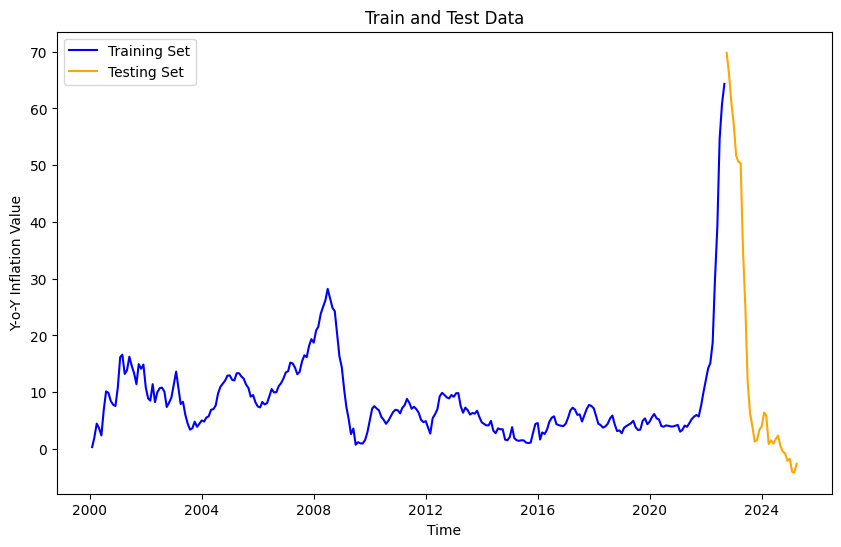

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# Plotting the train and test sets
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Set', color='blue')
plt.plot(test, label='Testing Set', color='orange')
plt.title('Train and Test Data')
plt.xlabel('Time')
plt.ylabel('Y-o-Y Inflation Value')
plt.legend()
plt.show()


In [11]:
df.columns

Index(['Inflation'], dtype='object')

In [12]:
!pip install optuna

## Random FOrest With DIfferent Lagged Features

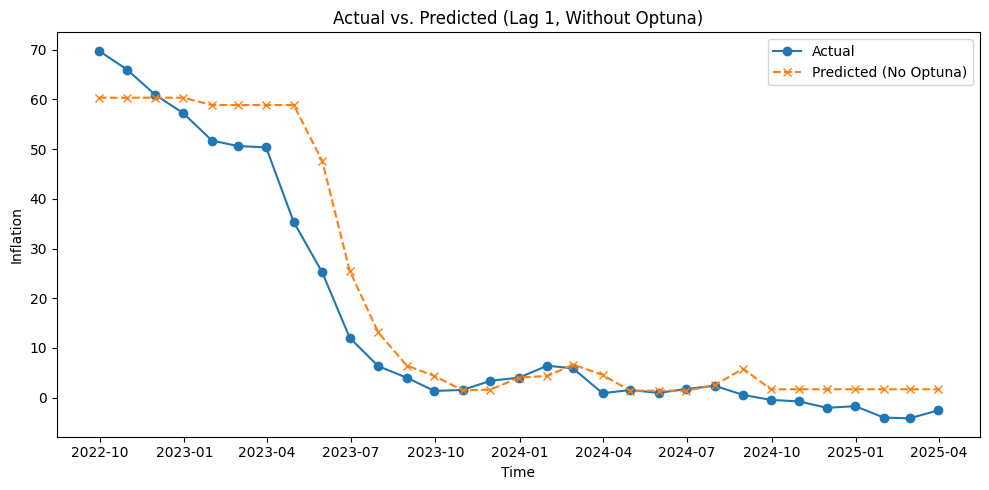

[I 2025-05-30 05:00:03,394] A new study created in memory with name: no-name-384e852b-cebc-4321-835d-9b5c445739d2
[I 2025-05-30 05:00:04,849] Trial 0 finished with value: 3.5607263248284 and parameters: {'n_estimators': 150, 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 3.5607263248284.
[I 2025-05-30 05:00:05,659] Trial 1 finished with value: 3.630067575105641 and parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 3.5607263248284.
[I 2025-05-30 05:00:09,033] Trial 2 finished with value: 3.6169704692780273 and parameters: {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 3.5607263248284.
[I 2025-05-30 05:00:15,025] Trial 3 finished with value: 3.6522032116471292 and parameters: {'n_estimators': 250, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 3.5607263248

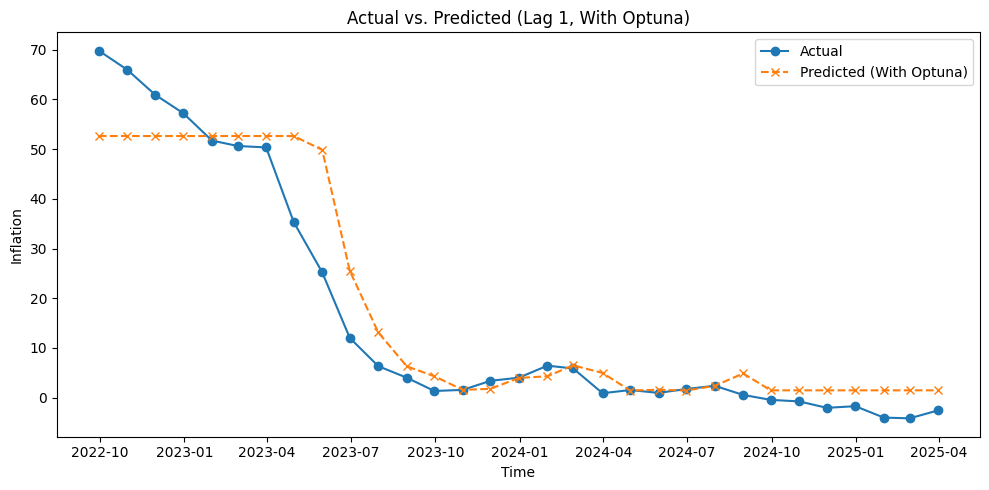

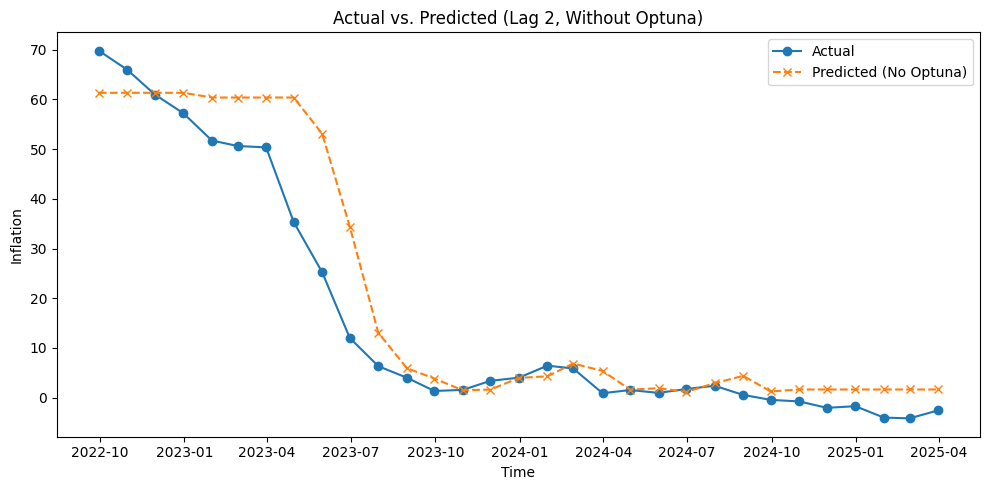

[I 2025-05-30 05:00:47,440] A new study created in memory with name: no-name-6a51e359-247f-47cc-b6ce-2e21efe907df
[I 2025-05-30 05:00:48,485] Trial 0 finished with value: 3.606771499374998 and parameters: {'n_estimators': 150, 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 3.606771499374998.
[I 2025-05-30 05:00:48,843] Trial 1 finished with value: 3.649186023107307 and parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 3.606771499374998.
[I 2025-05-30 05:00:50,212] Trial 2 finished with value: 3.646195722373244 and parameters: {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 3.606771499374998.
[I 2025-05-30 05:00:52,019] Trial 3 finished with value: 3.6828319479631135 and parameters: {'n_estimators': 250, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 3.606

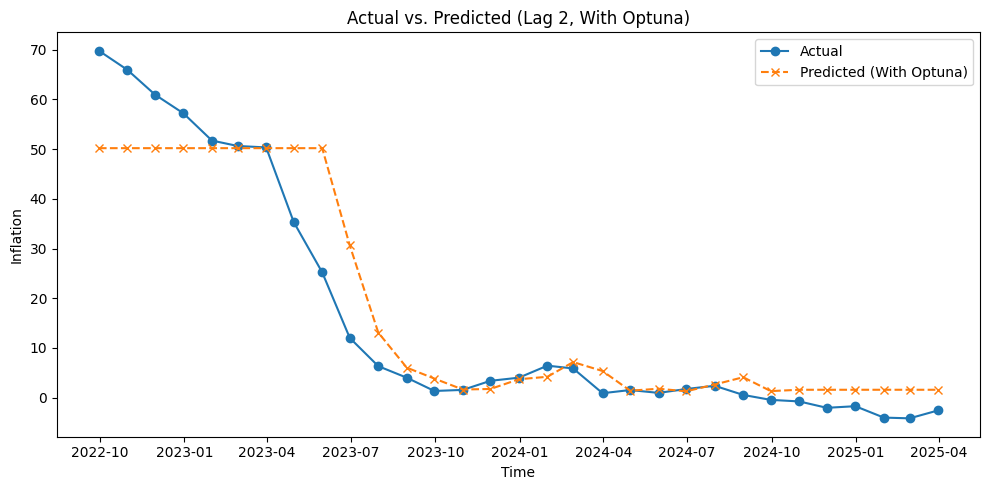

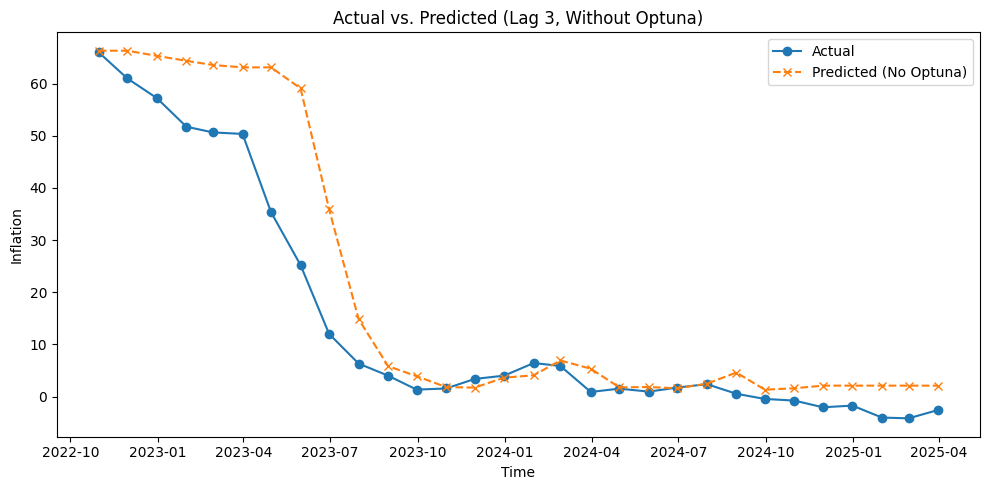

[I 2025-05-30 05:01:13,535] A new study created in memory with name: no-name-e30b0caf-7c12-4b9b-9ec0-4ca51ddd2ba2
[I 2025-05-30 05:01:14,615] Trial 0 finished with value: 4.039904778600028 and parameters: {'n_estimators': 150, 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 4.039904778600028.
[I 2025-05-30 05:01:14,995] Trial 1 finished with value: 4.0866979761449 and parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 4.039904778600028.
[I 2025-05-30 05:01:16,376] Trial 2 finished with value: 4.078045537648744 and parameters: {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 4.039904778600028.
[I 2025-05-30 05:01:18,254] Trial 3 finished with value: 4.108462753455008 and parameters: {'n_estimators': 250, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 4.039904

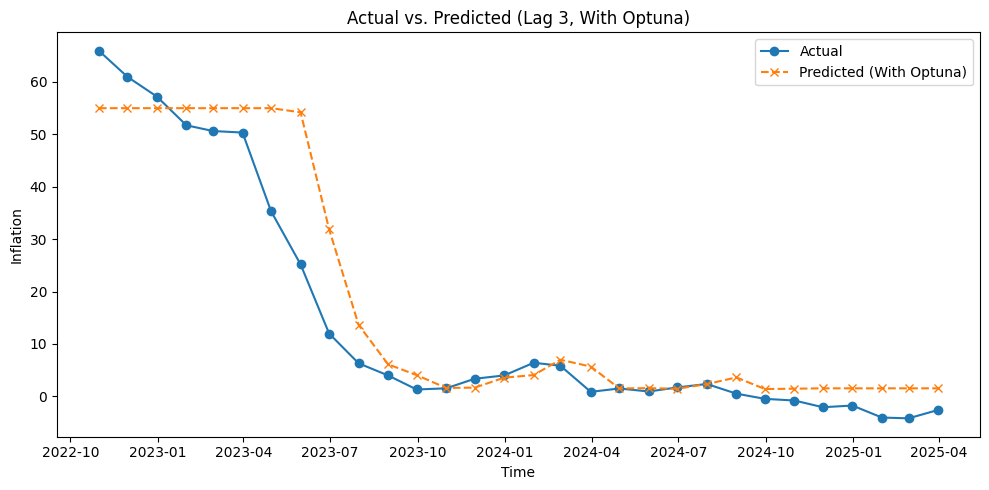

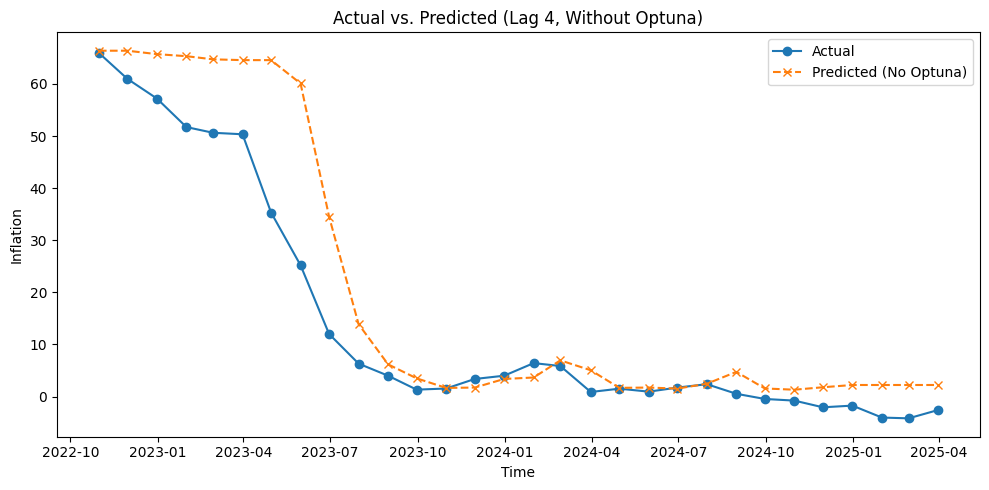

[I 2025-05-30 05:01:39,128] A new study created in memory with name: no-name-caa746ff-5b74-4c76-8f30-dbbf10e58733
[I 2025-05-30 05:01:40,279] Trial 0 finished with value: 3.950957870125355 and parameters: {'n_estimators': 150, 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 3.950957870125355.
[I 2025-05-30 05:01:40,676] Trial 1 finished with value: 4.077832255814574 and parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 3.950957870125355.
[I 2025-05-30 05:01:42,182] Trial 2 finished with value: 4.069520167431312 and parameters: {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 3.950957870125355.
[I 2025-05-30 05:01:44,203] Trial 3 finished with value: 3.857803674285054 and parameters: {'n_estimators': 250, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 3 with value: 3.8578

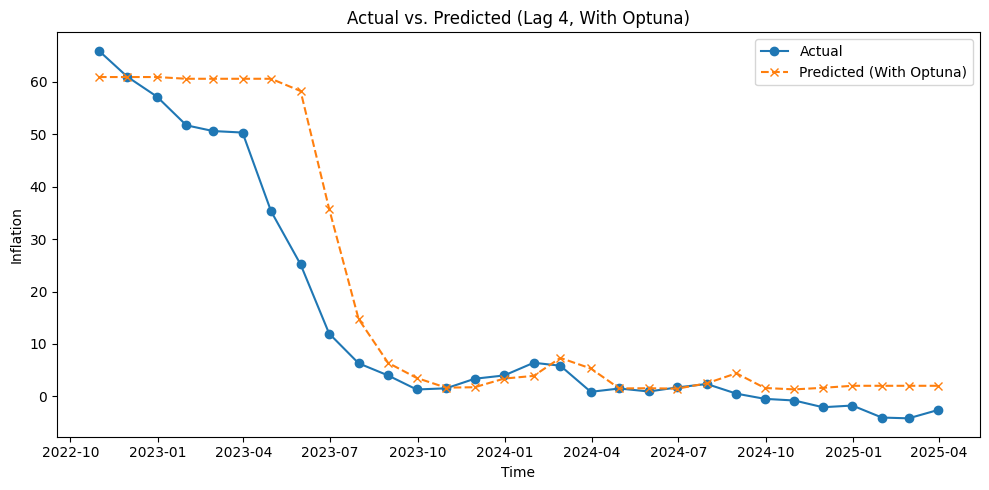

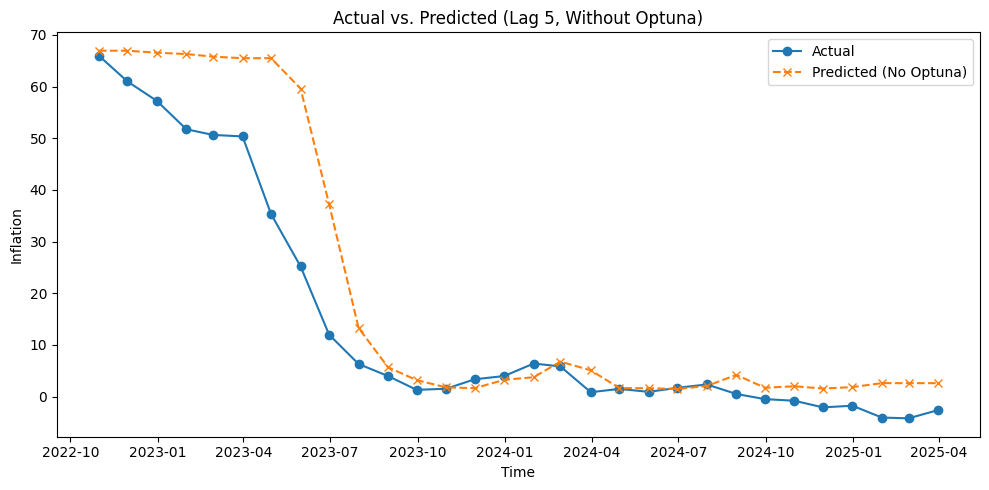

[I 2025-05-30 05:02:15,364] A new study created in memory with name: no-name-22495714-9f90-4073-9782-54742219b727
[I 2025-05-30 05:02:16,571] Trial 0 finished with value: 3.9909268444744526 and parameters: {'n_estimators': 150, 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 3.9909268444744526.
[I 2025-05-30 05:02:16,968] Trial 1 finished with value: 4.1063054078810834 and parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 3.9909268444744526.
[I 2025-05-30 05:02:18,444] Trial 2 finished with value: 4.087398749038502 and parameters: {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 3.9909268444744526.
[I 2025-05-30 05:02:20,598] Trial 3 finished with value: 3.882881838458637 and parameters: {'n_estimators': 250, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 3 with value: 3

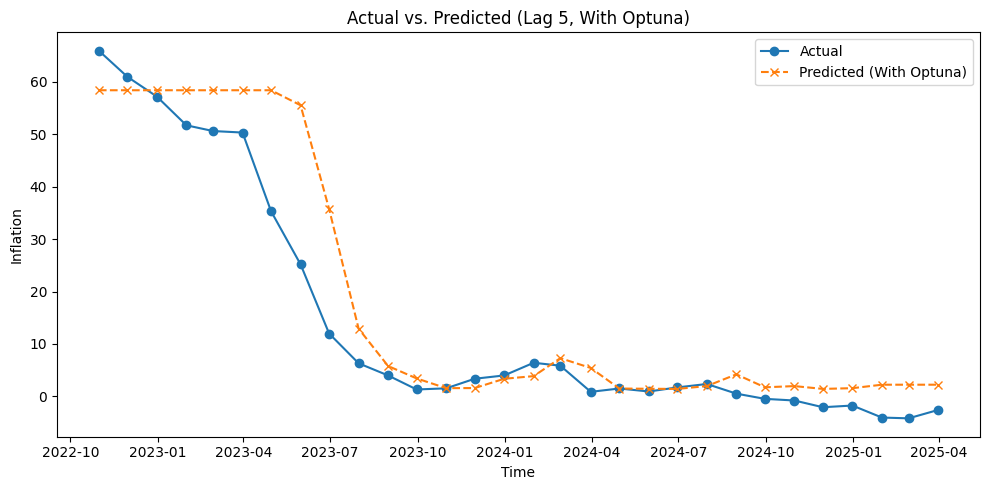

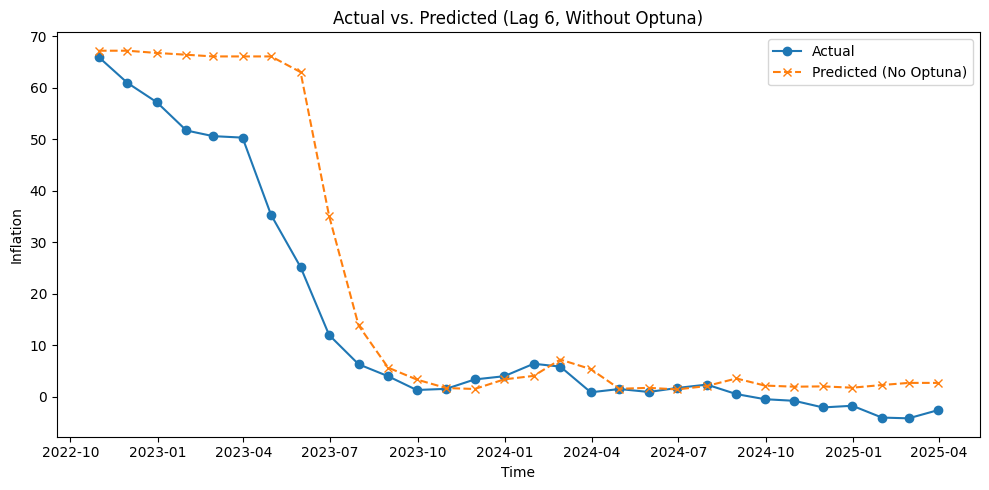

[I 2025-05-30 05:02:39,881] A new study created in memory with name: no-name-9c4ff907-c84b-408f-8edf-ec5e3dfb53b2
[I 2025-05-30 05:02:41,104] Trial 0 finished with value: 3.9952558191388228 and parameters: {'n_estimators': 150, 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 3.9952558191388228.
[I 2025-05-30 05:02:41,507] Trial 1 finished with value: 4.113431266711301 and parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 3.9952558191388228.
[I 2025-05-30 05:02:43,059] Trial 2 finished with value: 4.092061175978449 and parameters: {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 3.9952558191388228.
[I 2025-05-30 05:02:45,268] Trial 3 finished with value: 3.8264154032451985 and parameters: {'n_estimators': 250, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 3 with value: 3

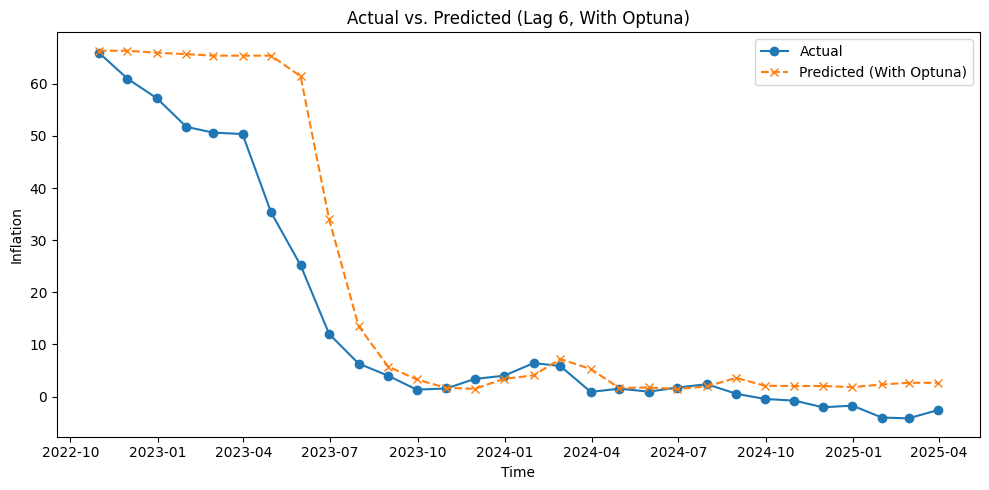

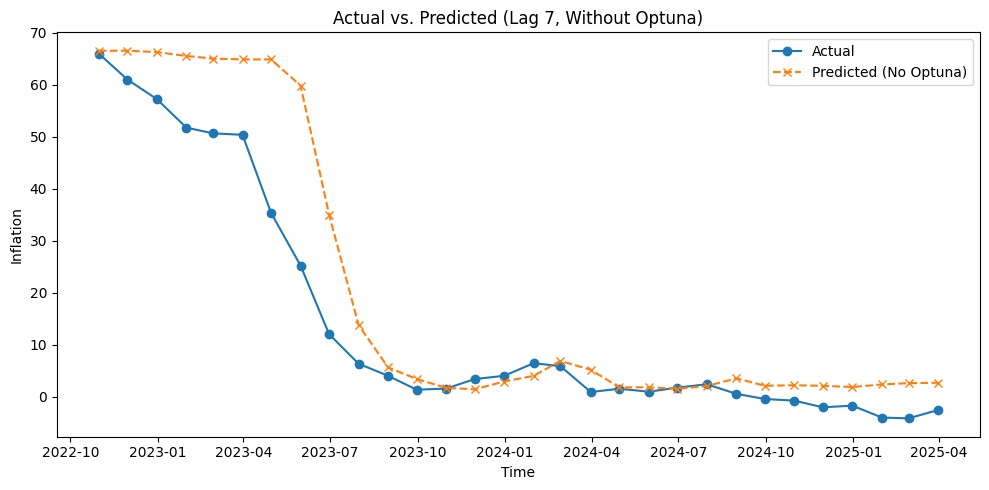

[I 2025-05-30 05:03:19,036] A new study created in memory with name: no-name-ef44ae3f-c739-4e18-b7e4-3f8c550609e3
[I 2025-05-30 05:03:20,284] Trial 0 finished with value: 4.011079985633955 and parameters: {'n_estimators': 150, 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 4.011079985633955.
[I 2025-05-30 05:03:20,713] Trial 1 finished with value: 4.130363290277236 and parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 4.011079985633955.
[I 2025-05-30 05:03:22,270] Trial 2 finished with value: 4.102923472802409 and parameters: {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 4.011079985633955.
[I 2025-05-30 05:03:24,519] Trial 3 finished with value: 3.863447170331926 and parameters: {'n_estimators': 250, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 3 with value: 3.8634

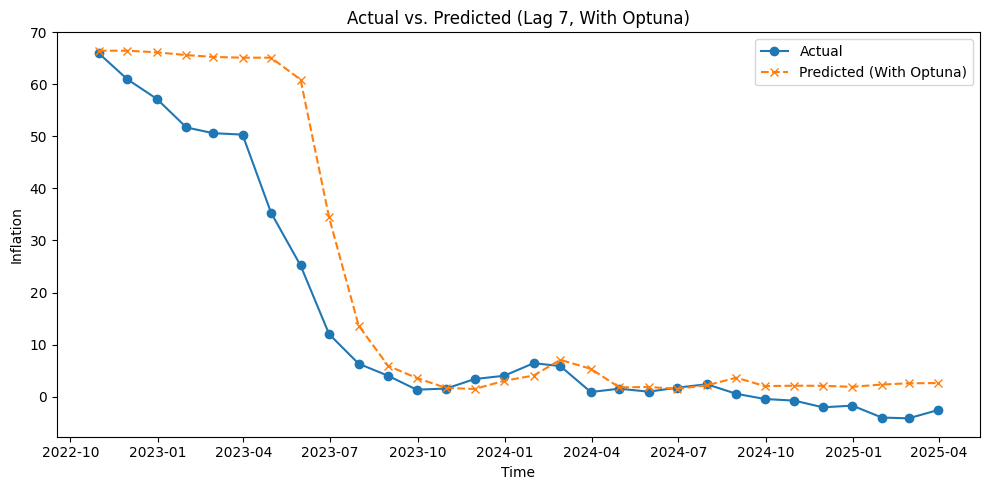

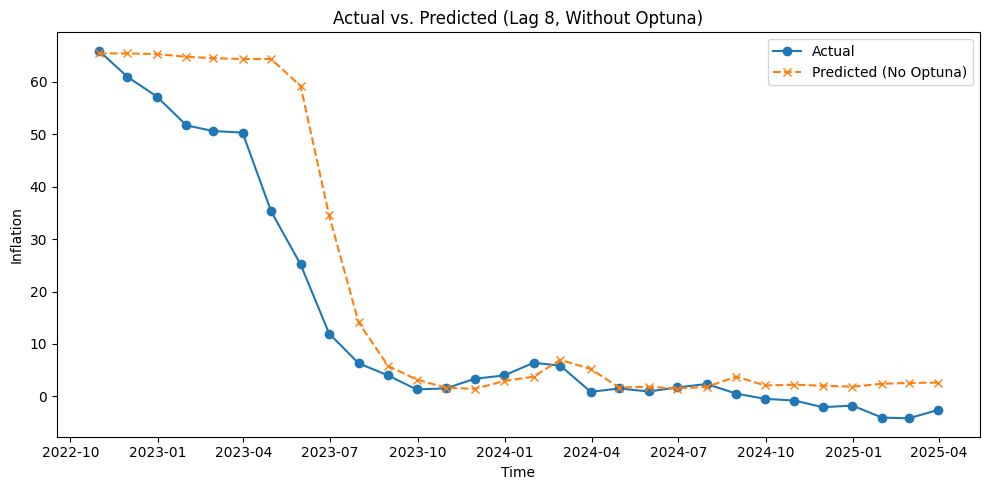

[I 2025-05-30 05:04:00,421] A new study created in memory with name: no-name-cac9a995-2b90-4a05-a180-5a23acc75730
[I 2025-05-30 05:04:01,698] Trial 0 finished with value: 4.063831209706991 and parameters: {'n_estimators': 150, 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 4.063831209706991.
[I 2025-05-30 05:04:02,125] Trial 1 finished with value: 4.173704362900186 and parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 4.063831209706991.
[I 2025-05-30 05:04:04,166] Trial 2 finished with value: 4.180645189028914 and parameters: {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 4.063831209706991.
[I 2025-05-30 05:04:07,002] Trial 3 finished with value: 3.896768400938856 and parameters: {'n_estimators': 250, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 3 with value: 3.8967

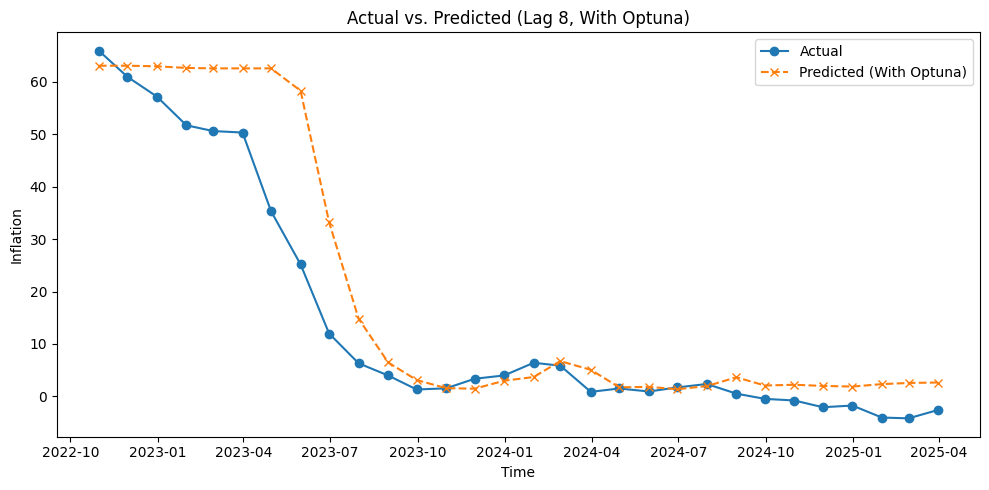

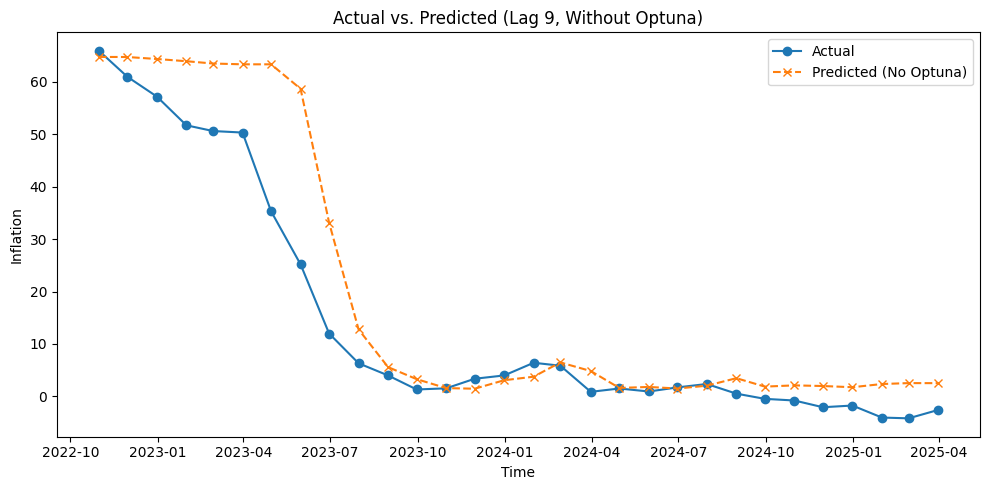

[I 2025-05-30 05:04:47,557] A new study created in memory with name: no-name-018c8cc8-8597-474e-a94d-534be2686cb1
[I 2025-05-30 05:04:48,893] Trial 0 finished with value: 4.126949289492975 and parameters: {'n_estimators': 150, 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 4.126949289492975.
[I 2025-05-30 05:04:49,557] Trial 1 finished with value: 4.253911456523347 and parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 4.126949289492975.
[I 2025-05-30 05:04:52,070] Trial 2 finished with value: 4.220512537632544 and parameters: {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 4.126949289492975.
[I 2025-05-30 05:04:54,483] Trial 3 finished with value: 3.973145789542528 and parameters: {'n_estimators': 250, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 3 with value: 3.9731

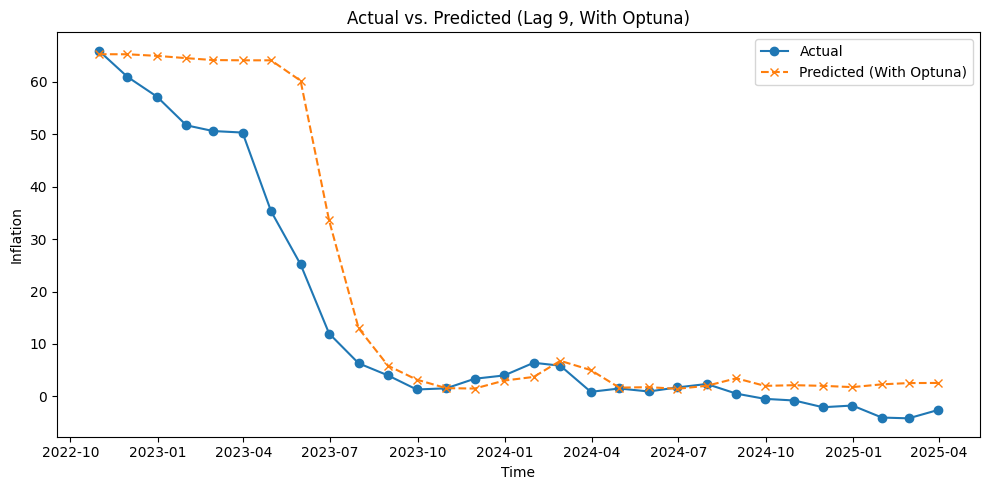

In [ ]:
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Set global random seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Assume df is already defined and has a column 'Inflation'

# Initialize results list
results = []

# Loop through lag terms from 1 to 9
for max_lag in range(1, 10):
    df_lagged = df.copy()

    # Create lag features
    for lag in range(1, max_lag + 1):
        df_lagged[f'Inflation_Lag_{lag}'] = df_lagged['Inflation'].shift(lag)

    # Drop NaN values
    df_lagged = df_lagged.dropna()

    # Split into train and test sets (90% train, 10% test)
    train_size = int(0.9 * len(df_lagged))
    train, test = df_lagged[:train_size], df_lagged[train_size:]

    y_train, y_test = train['Inflation'], test['Inflation']
    X_train = train[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]
    X_test = test[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]

    # Train Random Forest model without Optuna
    rf_model = RandomForestRegressor(n_estimators=100, random_state=SEED)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    results.append([max_lag, 'Without Optuna', rmse, mse, mae, mape, r2, "N/A"])

    # Plot actual vs. predicted
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.index, y_test, label="Actual", marker='o')
    plt.plot(y_test.index, y_pred, label="Predicted (No Optuna)", linestyle='dashed', marker='x')
    plt.title(f'Actual vs. Predicted (Lag {max_lag}, Without Optuna)')
    plt.xlabel("Time")
    plt.ylabel("Inflation")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Define Optuna objective function
    def objective(trial):
        n_estimators = trial.suggest_int("n_estimators", 50, 300, step=50)
        max_depth = trial.suggest_int("max_depth", 5, 50, step=5)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)

        rf_model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=SEED
        )

        tscv = TimeSeriesSplit(n_splits=5)
        rmse_scores = []
        for train_idx, val_idx in tscv.split(X_train):
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            rf_model.fit(X_train_fold, y_train_fold)
            y_pred_fold = rf_model.predict(X_val_fold)
            rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold)))

        return np.mean(rmse_scores)

    # Run Optuna optimization
    sampler = optuna.samplers.TPESampler(seed=SEED)
    study = optuna.create_study(direction="minimize", sampler=sampler)
    study.optimize(objective, n_trials=20)
    best_params = study.best_params

    # Train model with best Optuna parameters
    rf_best = RandomForestRegressor(**best_params, random_state=SEED)
    rf_best.fit(X_train, y_train)
    y_pred_optuna = rf_best.predict(X_test)

    # Evaluate optimized model
    mse_optuna = mean_squared_error(y_test, y_pred_optuna)
    rmse_optuna = np.sqrt(mse_optuna)
    mae_optuna = mean_absolute_error(y_test, y_pred_optuna)
    mape_optuna = np.mean(np.abs((y_test - y_pred_optuna) / y_test)) * 100
    r2_optuna = r2_score(y_test, y_pred_optuna)

    results.append([max_lag, 'With Optuna', rmse_optuna, mse_optuna, mae_optuna, mape_optuna, r2_optuna, best_params])

    # Plot actual vs. predicted for Optuna model
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.index, y_test, label="Actual", marker='o')
    plt.plot(y_test.index, y_pred_optuna, label="Predicted (With Optuna)", linestyle='dashed', marker='x')
    plt.title(f'Actual vs. Predicted (Lag {max_lag}, With Optuna)')
    plt.xlabel("Time")
    plt.ylabel("Inflation")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Save results to CSV
results_df = pd.DataFrame(results, columns=[
    'Lag Terms', 'Model Type', 'Test RMSE', 'Test MSE',
    'Test MAE', 'Test MAPE', 'Test R^2', 'Best Parameters'
])
results_df.to_csv('RF_90_10_ModelPerformance.csv', index=False)


## XGBoost With DIfferent Lagged Features

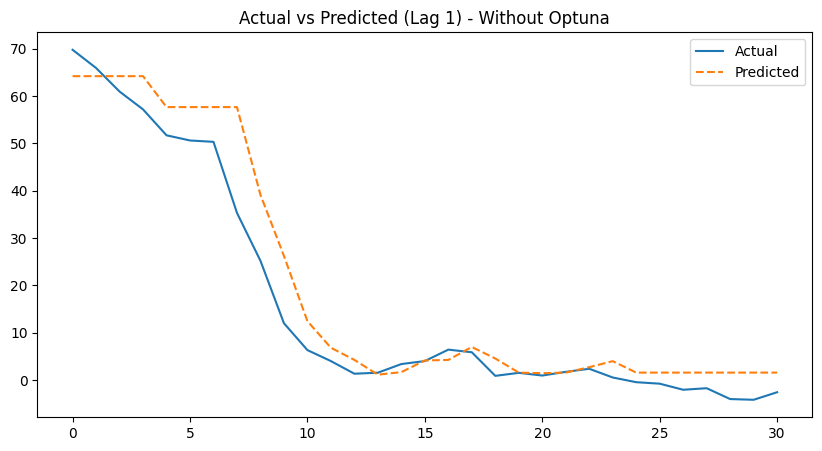

[I 2025-05-30 05:05:32,710] A new study created in memory with name: no-name-50724b36-484f-4a24-aa9e-7e61ca34ef16
[I 2025-05-30 05:05:32,937] Trial 0 finished with value: 3.745630204704598 and parameters: {'n_estimators': 150, 'max_depth': 15, 'learning_rate': 0.21000000000000002, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 0 with value: 3.745630204704598.
[I 2025-05-30 05:05:33,050] Trial 1 finished with value: 3.7209848279972713 and parameters: {'n_estimators': 50, 'max_depth': 15, 'learning_rate': 0.16000000000000003, 'min_child_weight': 8, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 1 with value: 3.7209848279972713.
[I 2025-05-30 05:05:33,384] Trial 2 finished with value: 3.7413485832213893 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.060000000000000005, 'min_child_weight': 2, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 1 with value: 3.7209848279972713.
[I 2025-05-30 05:05:33,691] Trial 3 f

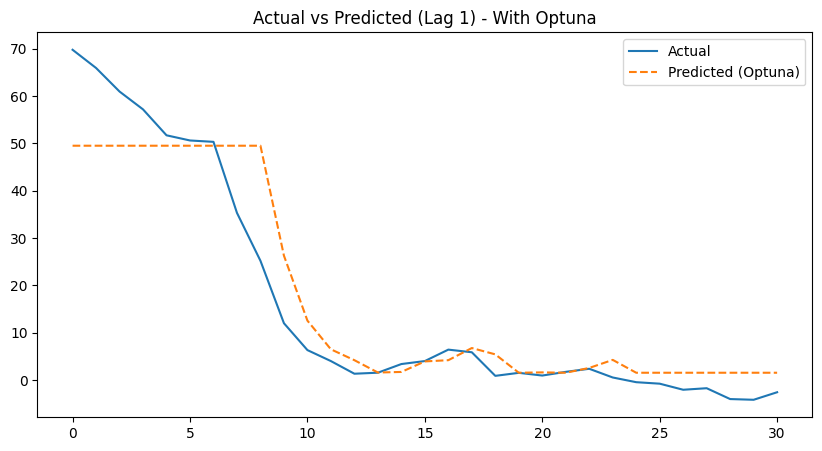

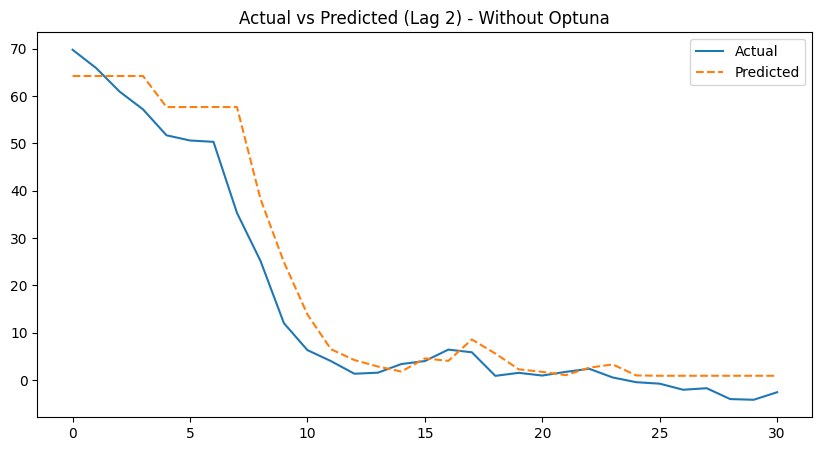

[I 2025-05-30 05:05:40,339] A new study created in memory with name: no-name-2ee4567e-94e3-419e-844c-94d77c4d68fa
[I 2025-05-30 05:05:40,580] Trial 0 finished with value: 3.9810122891967508 and parameters: {'n_estimators': 150, 'max_depth': 15, 'learning_rate': 0.21000000000000002, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 0 with value: 3.9810122891967508.
[I 2025-05-30 05:05:40,699] Trial 1 finished with value: 3.801516426292392 and parameters: {'n_estimators': 50, 'max_depth': 15, 'learning_rate': 0.16000000000000003, 'min_child_weight': 8, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 1 with value: 3.801516426292392.
[I 2025-05-30 05:05:41,065] Trial 2 finished with value: 3.925941453505202 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.060000000000000005, 'min_child_weight': 2, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 1 with value: 3.801516426292392.
[I 2025-05-30 05:05:41,347] Trial 3 fin

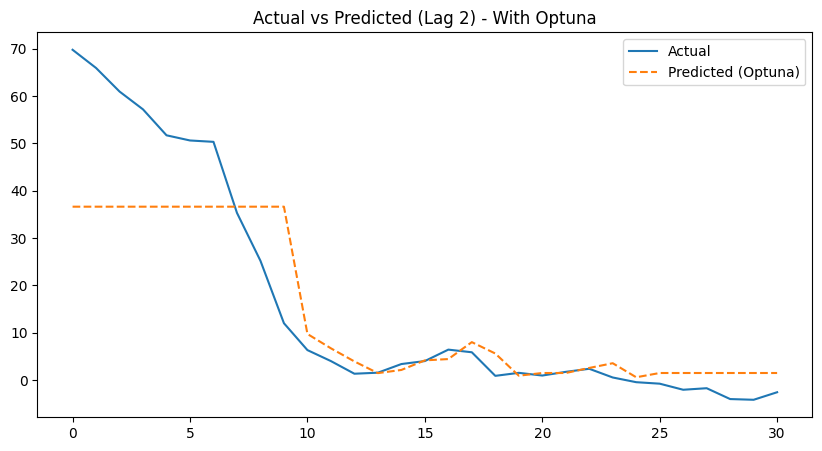

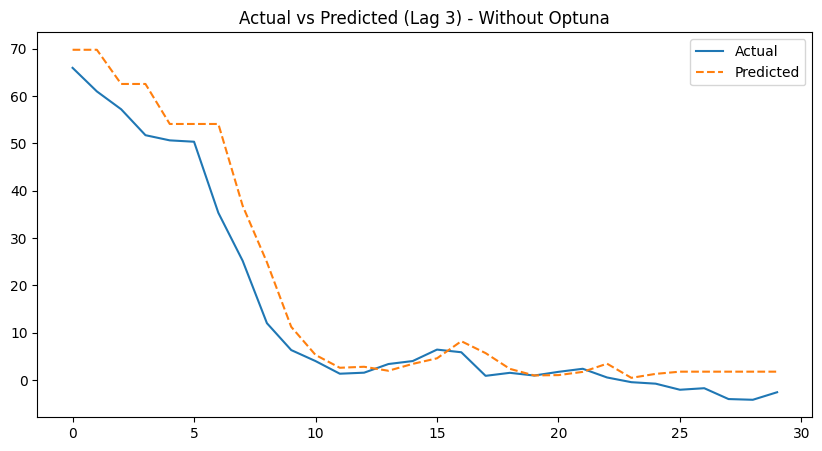

[I 2025-05-30 05:05:45,631] A new study created in memory with name: no-name-0a991ec4-6225-499a-8108-fe889d7f16f6
[I 2025-05-30 05:05:45,871] Trial 0 finished with value: 4.542444370899974 and parameters: {'n_estimators': 150, 'max_depth': 15, 'learning_rate': 0.21000000000000002, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 0 with value: 4.542444370899974.
[I 2025-05-30 05:05:46,000] Trial 1 finished with value: 4.231533257482572 and parameters: {'n_estimators': 50, 'max_depth': 15, 'learning_rate': 0.16000000000000003, 'min_child_weight': 8, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 1 with value: 4.231533257482572.
[I 2025-05-30 05:05:46,441] Trial 2 finished with value: 4.159774708634577 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.060000000000000005, 'min_child_weight': 2, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 2 with value: 4.159774708634577.
[I 2025-05-30 05:05:46,765] Trial 3 finis

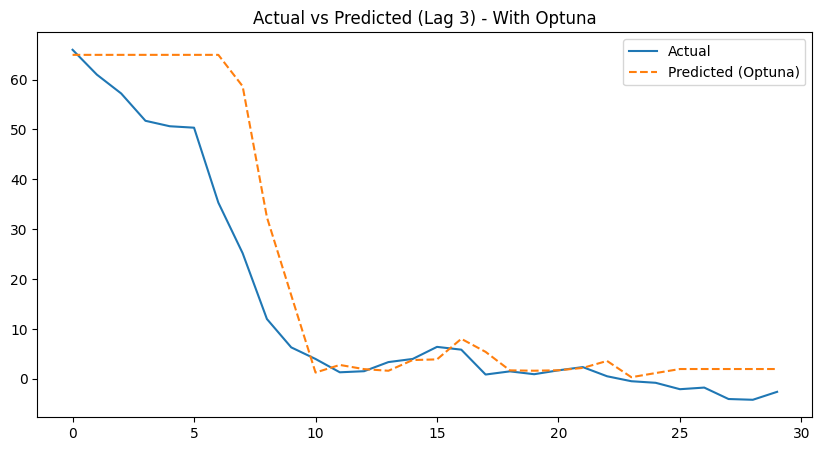

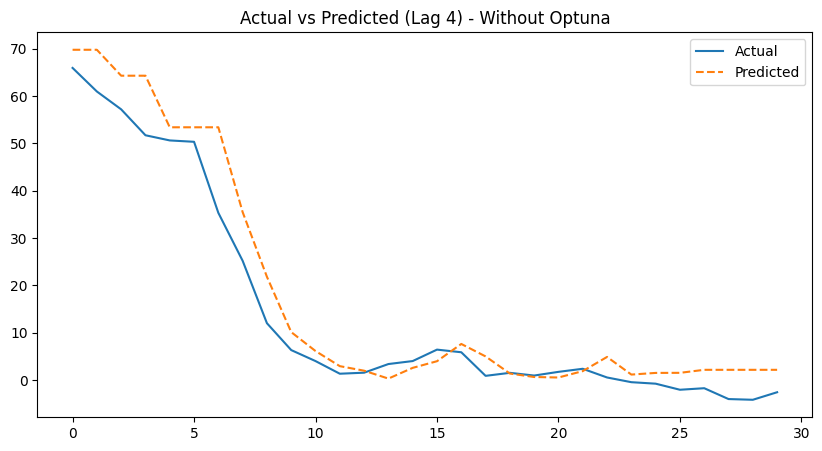

[I 2025-05-30 05:05:55,788] A new study created in memory with name: no-name-86f28ea0-7bda-4efd-aa0e-ebdb55928f71
[I 2025-05-30 05:05:56,065] Trial 0 finished with value: 4.1677364661215766 and parameters: {'n_estimators': 150, 'max_depth': 15, 'learning_rate': 0.21000000000000002, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 0 with value: 4.1677364661215766.
[I 2025-05-30 05:05:56,219] Trial 1 finished with value: 4.180290117158191 and parameters: {'n_estimators': 50, 'max_depth': 15, 'learning_rate': 0.16000000000000003, 'min_child_weight': 8, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 0 with value: 4.1677364661215766.
[I 2025-05-30 05:05:56,675] Trial 2 finished with value: 3.967654522426064 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.060000000000000005, 'min_child_weight': 2, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 2 with value: 3.967654522426064.
[I 2025-05-30 05:05:57,040] Trial 3 fi

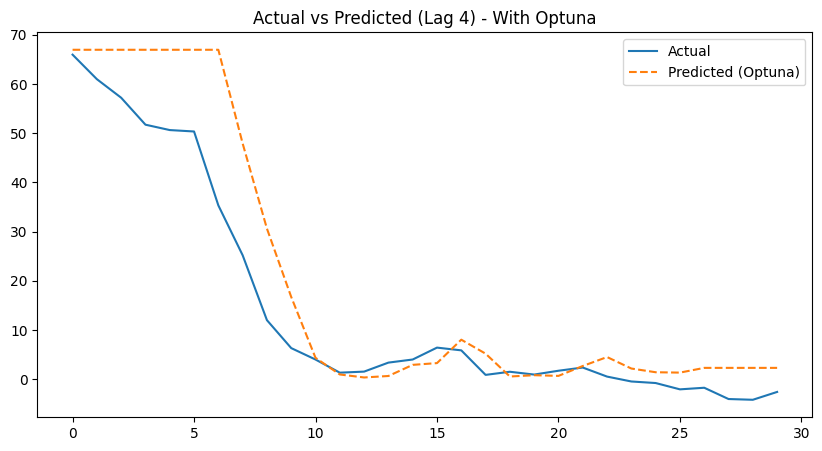

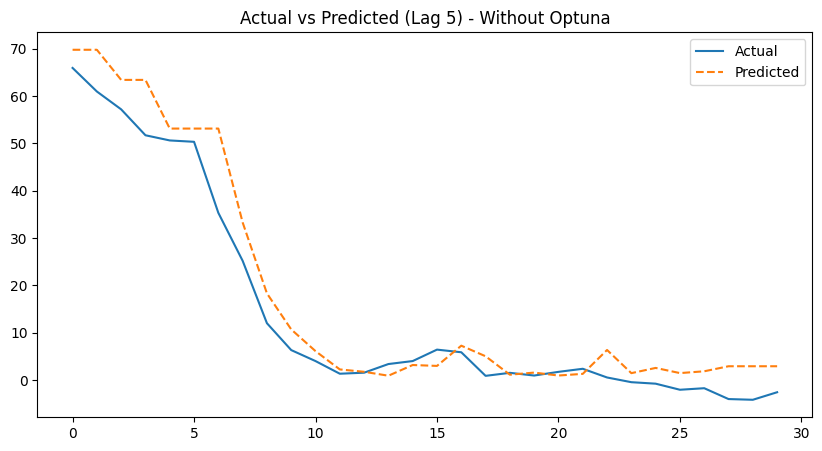

[I 2025-05-30 05:06:07,276] A new study created in memory with name: no-name-7410dcad-a9e2-4a58-b3f3-e8327b8dc597
[I 2025-05-30 05:06:07,566] Trial 0 finished with value: 4.20756860633363 and parameters: {'n_estimators': 150, 'max_depth': 15, 'learning_rate': 0.21000000000000002, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 0 with value: 4.20756860633363.
[I 2025-05-30 05:06:07,720] Trial 1 finished with value: 4.2873871421712195 and parameters: {'n_estimators': 50, 'max_depth': 15, 'learning_rate': 0.16000000000000003, 'min_child_weight': 8, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 0 with value: 4.20756860633363.
[I 2025-05-30 05:06:08,232] Trial 2 finished with value: 4.036682567193712 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.060000000000000005, 'min_child_weight': 2, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 2 with value: 4.036682567193712.
[I 2025-05-30 05:06:08,681] Trial 3 finishe

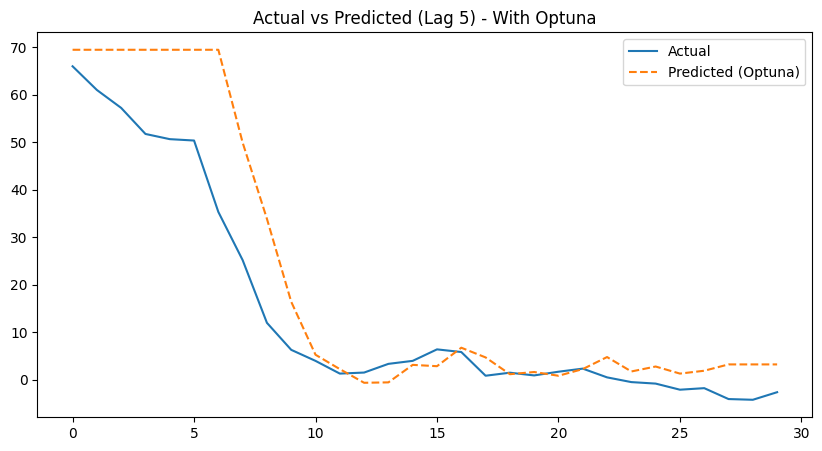

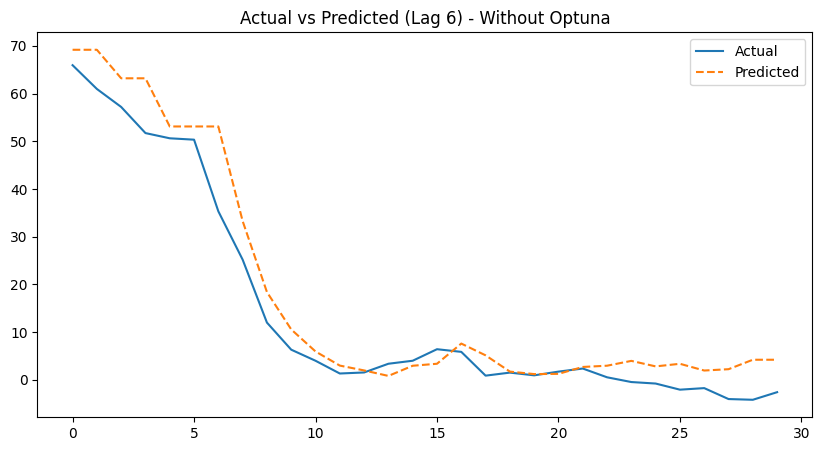

[I 2025-05-30 05:06:20,167] A new study created in memory with name: no-name-ec6df1f0-8cfa-4fb2-bba7-817f0e7b3b8f
[I 2025-05-30 05:06:20,507] Trial 0 finished with value: 4.211041976608937 and parameters: {'n_estimators': 150, 'max_depth': 15, 'learning_rate': 0.21000000000000002, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 0 with value: 4.211041976608937.
[I 2025-05-30 05:06:20,677] Trial 1 finished with value: 4.269263686241342 and parameters: {'n_estimators': 50, 'max_depth': 15, 'learning_rate': 0.16000000000000003, 'min_child_weight': 8, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 0 with value: 4.211041976608937.
[I 2025-05-30 05:06:21,233] Trial 2 finished with value: 4.025203080729321 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.060000000000000005, 'min_child_weight': 2, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 2 with value: 4.025203080729321.
[I 2025-05-30 05:06:21,710] Trial 3 finis

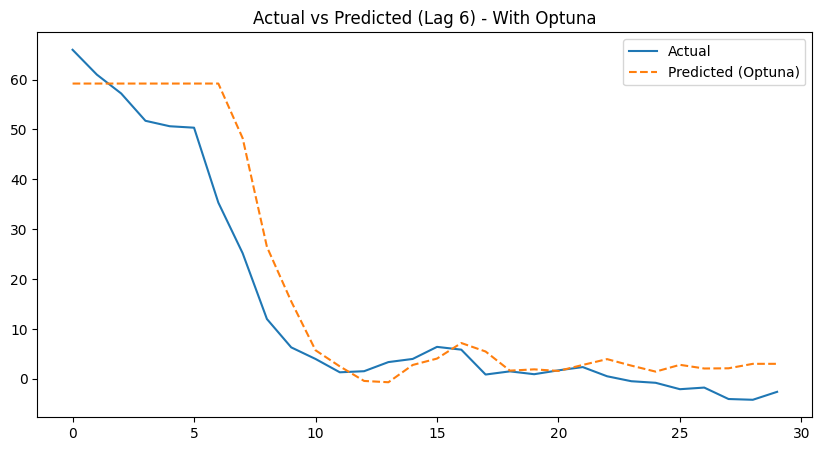

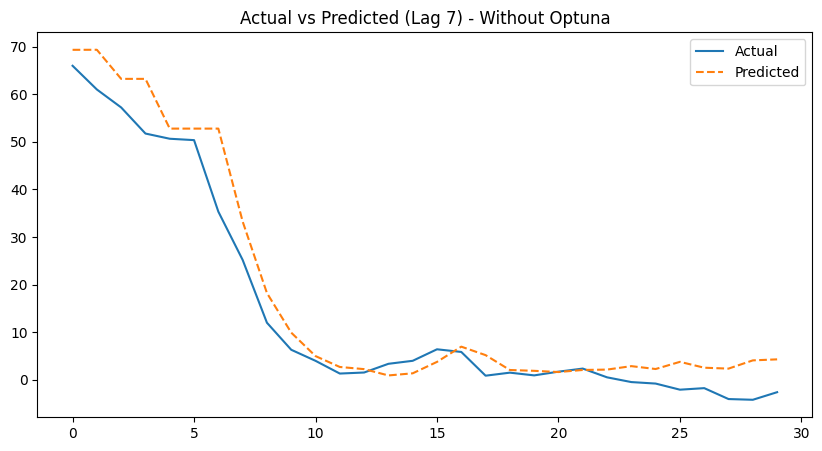

[I 2025-05-30 05:06:29,993] A new study created in memory with name: no-name-b84bd224-3a2e-4e2a-b0f7-b292dcaddda8
[I 2025-05-30 05:06:30,364] Trial 0 finished with value: 4.31390262263107 and parameters: {'n_estimators': 150, 'max_depth': 15, 'learning_rate': 0.21000000000000002, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 0 with value: 4.31390262263107.
[I 2025-05-30 05:06:30,587] Trial 1 finished with value: 4.2890664538851055 and parameters: {'n_estimators': 50, 'max_depth': 15, 'learning_rate': 0.16000000000000003, 'min_child_weight': 8, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 1 with value: 4.2890664538851055.
[I 2025-05-30 05:06:31,224] Trial 2 finished with value: 4.050375805240935 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.060000000000000005, 'min_child_weight': 2, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 2 with value: 4.050375805240935.
[I 2025-05-30 05:06:31,718] Trial 3 finis

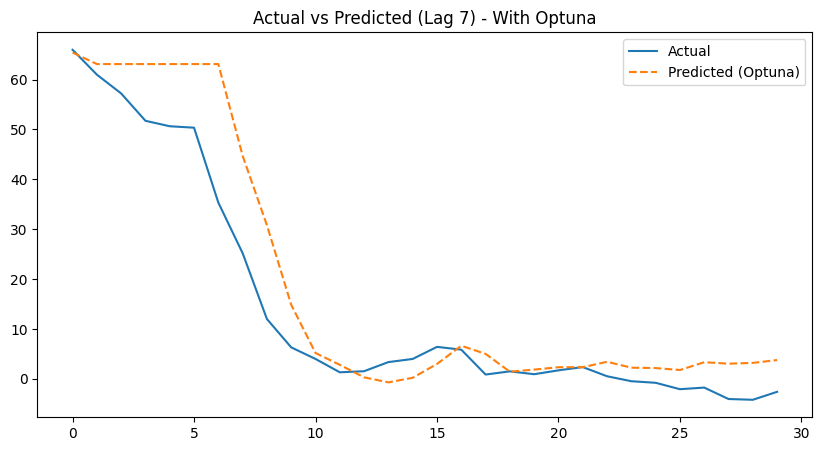

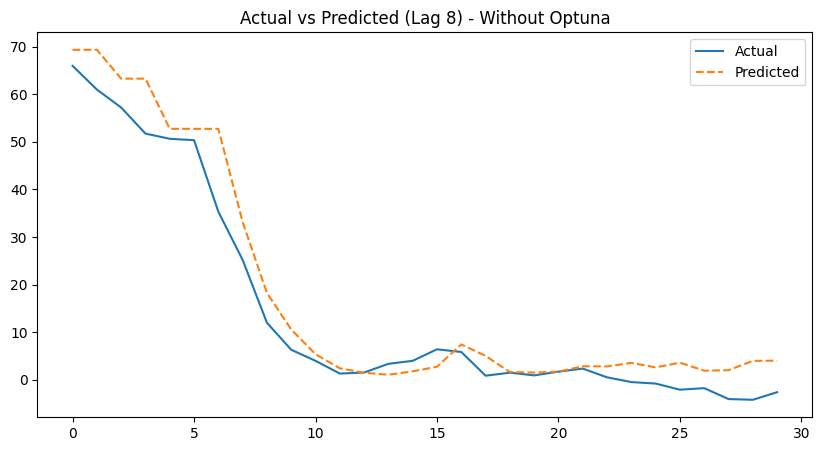

[I 2025-05-30 05:06:43,583] A new study created in memory with name: no-name-ad135899-f0b2-4a35-a599-c086e94bb92d
[I 2025-05-30 05:06:43,974] Trial 0 finished with value: 4.332115021115875 and parameters: {'n_estimators': 150, 'max_depth': 15, 'learning_rate': 0.21000000000000002, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 0 with value: 4.332115021115875.
[I 2025-05-30 05:06:44,155] Trial 1 finished with value: 4.304150214148485 and parameters: {'n_estimators': 50, 'max_depth': 15, 'learning_rate': 0.16000000000000003, 'min_child_weight': 8, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 1 with value: 4.304150214148485.
[I 2025-05-30 05:06:44,785] Trial 2 finished with value: 4.119748500890902 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.060000000000000005, 'min_child_weight': 2, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 2 with value: 4.119748500890902.
[I 2025-05-30 05:06:45,314] Trial 3 finis

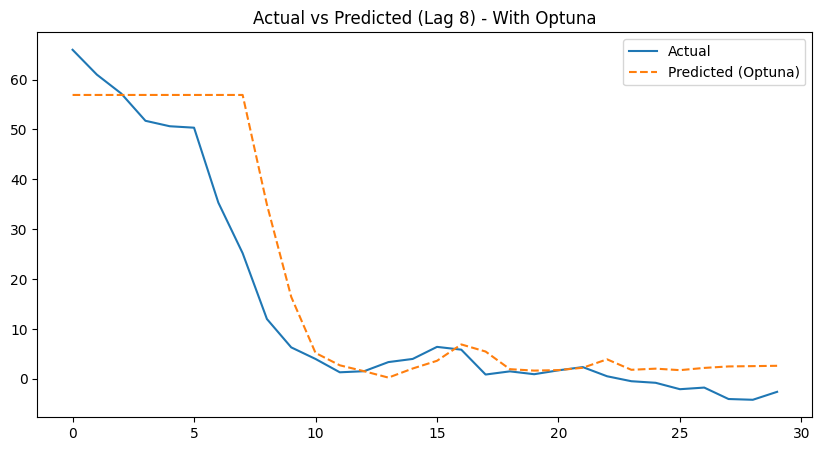

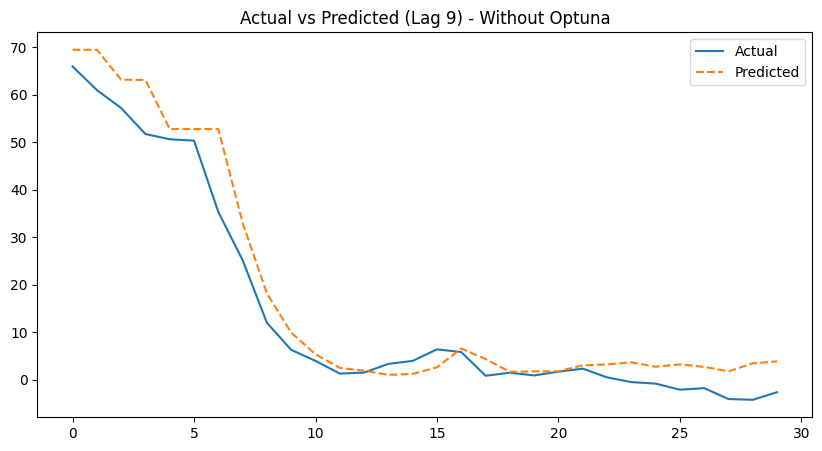

[I 2025-05-30 05:06:56,262] A new study created in memory with name: no-name-dc3cbb84-4a91-4ec2-b6ac-4070c661d2cc
[I 2025-05-30 05:06:56,689] Trial 0 finished with value: 4.556000256810447 and parameters: {'n_estimators': 150, 'max_depth': 15, 'learning_rate': 0.21000000000000002, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 0 with value: 4.556000256810447.
[I 2025-05-30 05:06:56,881] Trial 1 finished with value: 4.450582988987398 and parameters: {'n_estimators': 50, 'max_depth': 15, 'learning_rate': 0.16000000000000003, 'min_child_weight': 8, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 1 with value: 4.450582988987398.
[I 2025-05-30 05:06:57,610] Trial 2 finished with value: 4.142394708072243 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.060000000000000005, 'min_child_weight': 2, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 2 with value: 4.142394708072243.
[I 2025-05-30 05:06:58,163] Trial 3 finis

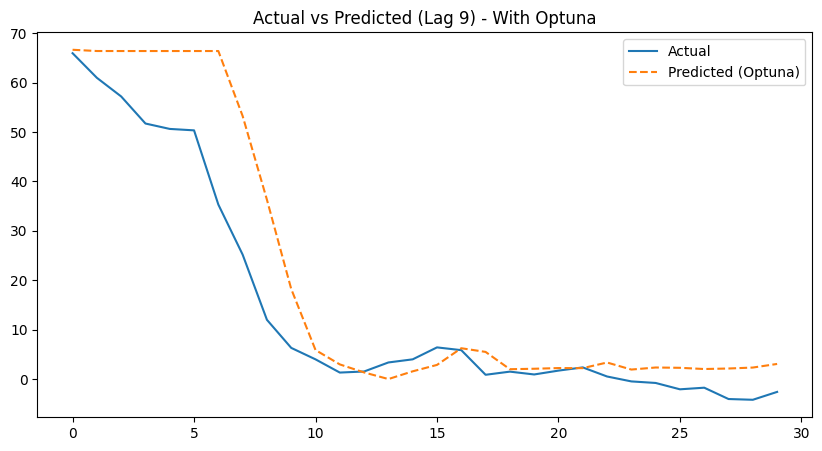

In [ ]:
import pandas as pd
import numpy as np
import optuna
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Set global random seed
SEED = 42
np.random.seed(SEED)

# Initialize results list
results = []

# Loop through lag terms from 1 to 9
for max_lag in range(1, 10):
    df_lagged = df.copy()

    # Create lag features
    for lag in range(1, max_lag + 1):
        df_lagged[f'Inflation_Lag_{lag}'] = df_lagged['Inflation'].shift(lag)

    # Drop NaN values
    df_lagged = df_lagged.dropna()

    # Split into train and test sets
    train_size = int(0.9 * len(df_lagged))
    train, test = df_lagged[:train_size], df_lagged[train_size:]

    y_train, y_test = train['Inflation'], test['Inflation']
    X_train = train[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]
    X_test = test[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]

    # Train XGBoost model without Optuna
    xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=SEED)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    results.append([max_lag, 'Without Optuna', rmse, mse, mae, mape, r2, 'N/A'])

    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted', linestyle='dashed')
    plt.title(f'Actual vs Predicted (Lag {max_lag}) - Without Optuna')
    plt.legend()
    plt.show()

    # Define Optuna objective function
    def objective(trial):
        n_estimators = trial.suggest_int("n_estimators", 50, 300, step=50)
        max_depth = trial.suggest_int("max_depth", 3, 15, step=2)
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05)
        min_child_weight = trial.suggest_int("min_child_weight", 1, 10)
        subsample = trial.suggest_float("subsample", 0.5, 1.0, step=0.1)
        colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0, step=0.1)

        xgb_model = xgb.XGBRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            min_child_weight=min_child_weight,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            random_state=SEED
        )

        tscv = TimeSeriesSplit(n_splits=5)
        rmse_scores = []
        for train_idx, val_idx in tscv.split(X_train):
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            xgb_model.fit(X_train_fold, y_train_fold)
            y_pred_fold = xgb_model.predict(X_val_fold)
            rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold)))

        return np.mean(rmse_scores)

    # Run Optuna optimization with reproducibility
    sampler = optuna.samplers.TPESampler(seed=SEED)
    study = optuna.create_study(direction="minimize", sampler=sampler)
    study.optimize(objective, n_trials=20)
    best_params = study.best_params

    # Train best model
    xgb_best = xgb.XGBRegressor(**best_params, random_state=SEED)
    xgb_best.fit(X_train, y_train)
    y_pred_optuna = xgb_best.predict(X_test)

    # Evaluate Optuna model
    mse_optuna = mean_squared_error(y_test, y_pred_optuna)
    rmse_optuna = np.sqrt(mse_optuna)
    mae_optuna = mean_absolute_error(y_test, y_pred_optuna)
    mape_optuna = np.mean(np.abs((y_test - y_pred_optuna) / y_test)) * 100
    r2_optuna = r2_score(y_test, y_pred_optuna)

    results.append([max_lag, 'With Optuna', rmse_optuna, mse_optuna, mae_optuna, mape_optuna, r2_optuna, best_params])

    # Plot actual vs. predicted values for Optuna model
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred_optuna, label='Predicted (Optuna)', linestyle='dashed')
    plt.title(f'Actual vs Predicted (Lag {max_lag}) - With Optuna')
    plt.legend()
    plt.show()

# Save results to CSV
results_df = pd.DataFrame(results, columns=['Lag Terms', 'Model Type', 'Test RMSE', 'Test MSE', 'Test MAE', 'Test MAPE', 'Test R2', 'Best Params'])
results_df.to_csv('XGB_90_10_Model Performance.csv', index=False)


## SVR

In [13]:
! pip install optuna

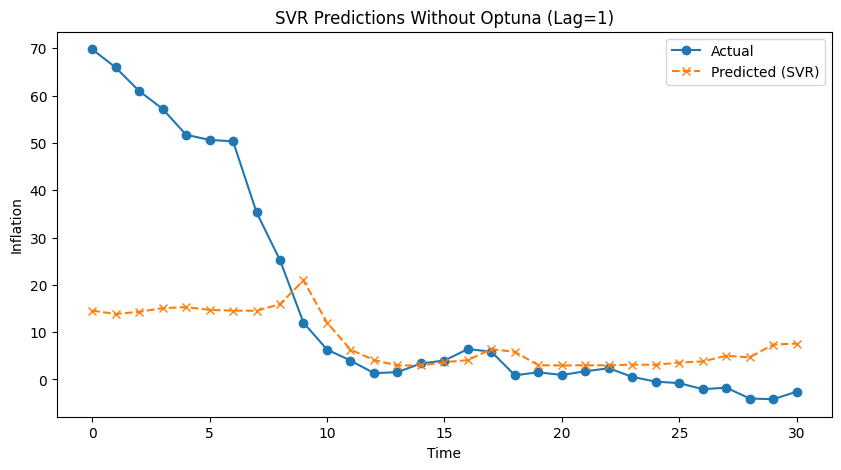

[I 2025-05-30 06:35:12,185] A new study created in memory with name: no-name-d18d0543-f73c-4f47-a42a-54cc9df04cba
[I 2025-05-30 06:35:12,276] Trial 0 finished with value: 1.717988650437127 and parameters: {'C': 3.807947176588889, 'epsilon': 0.951207163345817, 'kernel': 'linear'}. Best is trial 0 with value: 1.717988650437127.
[I 2025-05-30 06:35:12,325] Trial 1 finished with value: 11.880687360781328 and parameters: {'C': 0.6750277604651747, 'epsilon': 0.8675143843171859, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.717988650437127.
[I 2025-05-30 06:35:12,378] Trial 2 finished with value: 75.13412629740154 and parameters: {'C': 8.341182143924176, 'epsilon': 0.2202157195714934, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.717988650437127.
[I 2025-05-30 06:35:12,511] Trial 3 finished with value: 1.7338196111027362 and parameters: {'C': 4.376255684556946, 'epsilon': 0.2983168487960615, 'kernel': 'linear'}. Best is trial 0 with value: 1.717988650437127.
[I 2025-05-30 06:35:12

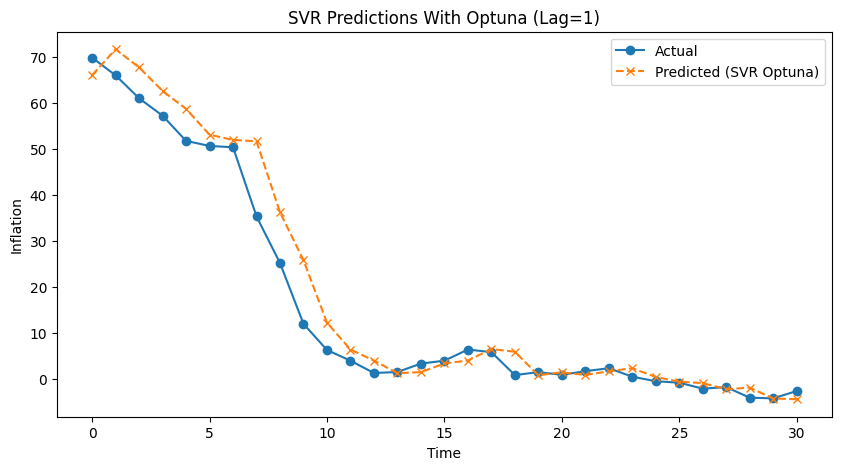

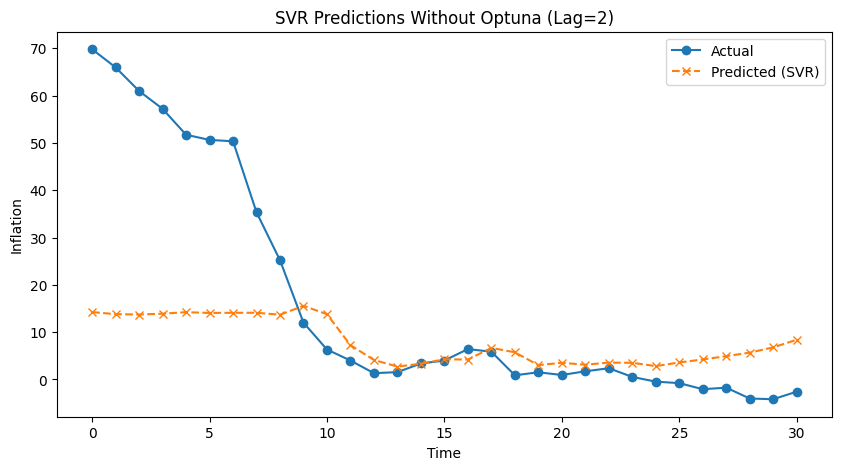

[I 2025-05-30 06:35:16,436] A new study created in memory with name: no-name-ca272b34-05bf-497a-b8b8-3eec4d480d9f
[I 2025-05-30 06:35:16,621] Trial 0 finished with value: 1.551275991781483 and parameters: {'C': 3.807947176588889, 'epsilon': 0.951207163345817, 'kernel': 'linear'}. Best is trial 0 with value: 1.551275991781483.
[I 2025-05-30 06:35:16,673] Trial 1 finished with value: 11.983817025294634 and parameters: {'C': 0.6750277604651747, 'epsilon': 0.8675143843171859, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.551275991781483.
[I 2025-05-30 06:35:16,771] Trial 2 finished with value: 75.24168254039614 and parameters: {'C': 8.341182143924176, 'epsilon': 0.2202157195714934, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.551275991781483.
[I 2025-05-30 06:35:17,092] Trial 3 finished with value: 1.5618262913695222 and parameters: {'C': 4.376255684556946, 'epsilon': 0.2983168487960615, 'kernel': 'linear'}. Best is trial 0 with value: 1.551275991781483.
[I 2025-05-30 06:35:17

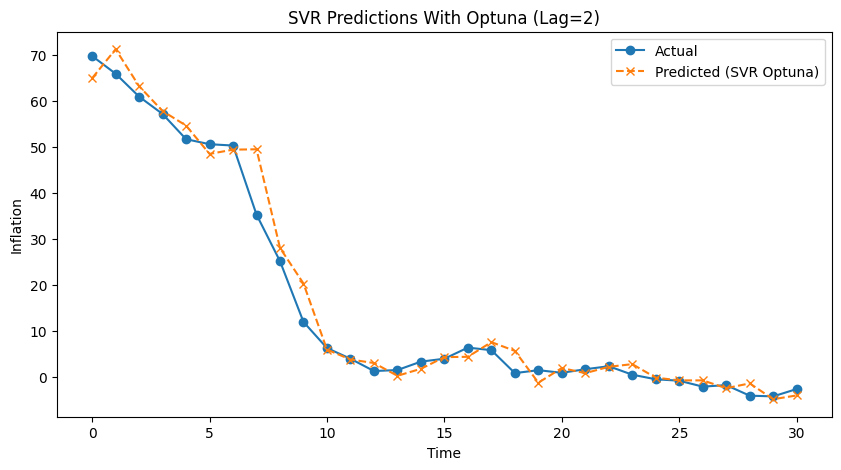

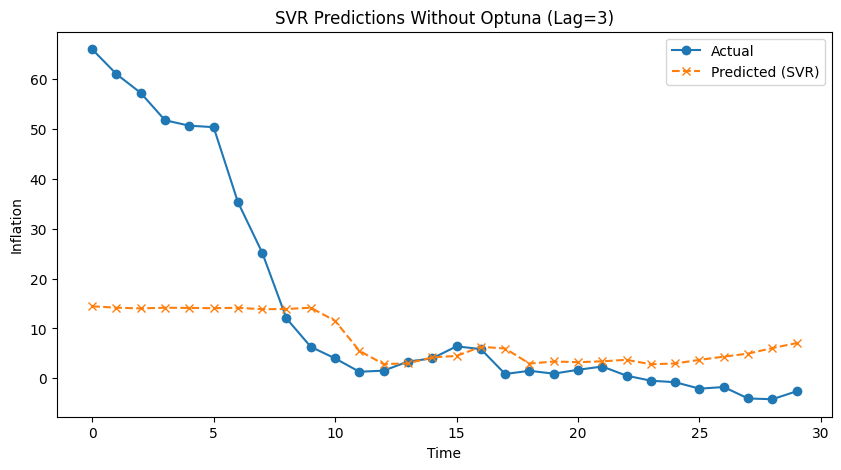

[I 2025-05-30 06:35:24,410] A new study created in memory with name: no-name-c3df2082-52a7-4427-955c-3a8513b3fd97
[I 2025-05-30 06:35:24,949] Trial 0 finished with value: 1.5883006585747146 and parameters: {'C': 3.807947176588889, 'epsilon': 0.951207163345817, 'kernel': 'linear'}. Best is trial 0 with value: 1.5883006585747146.
[I 2025-05-30 06:35:25,105] Trial 1 finished with value: 12.450151721224376 and parameters: {'C': 0.6750277604651747, 'epsilon': 0.8675143843171859, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.5883006585747146.
[I 2025-05-30 06:35:25,304] Trial 2 finished with value: 75.673725124755 and parameters: {'C': 8.341182143924176, 'epsilon': 0.2202157195714934, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.5883006585747146.
[I 2025-05-30 06:35:25,804] Trial 3 finished with value: 1.617713246860422 and parameters: {'C': 4.376255684556946, 'epsilon': 0.2983168487960615, 'kernel': 'linear'}. Best is trial 0 with value: 1.5883006585747146.
[I 2025-05-30 06:35:

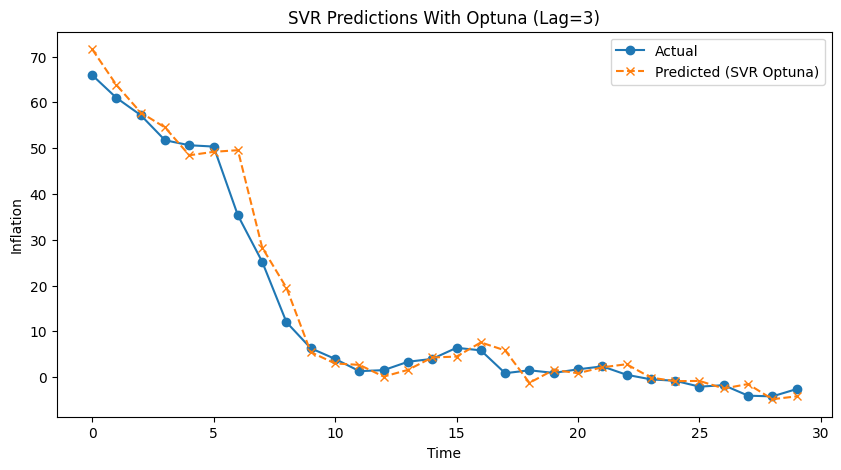

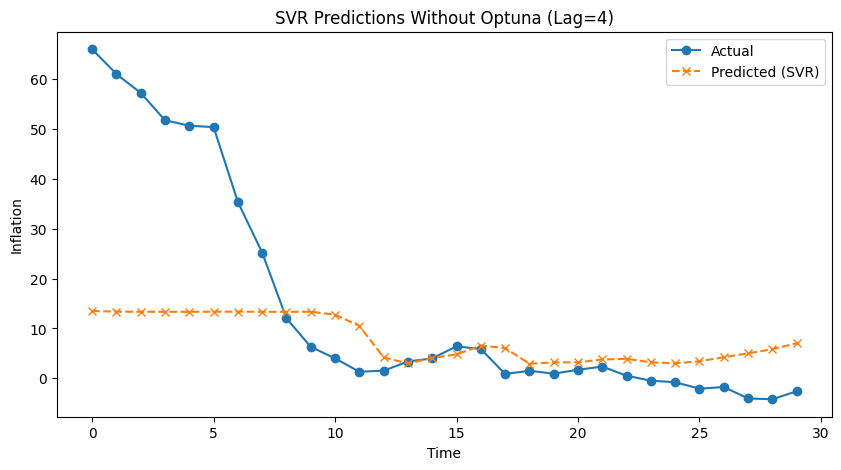

[I 2025-05-30 06:35:36,775] A new study created in memory with name: no-name-db209d08-fbd0-4003-b814-13cec0a85921
[I 2025-05-30 06:35:37,077] Trial 0 finished with value: 1.623999472378753 and parameters: {'C': 3.807947176588889, 'epsilon': 0.951207163345817, 'kernel': 'linear'}. Best is trial 0 with value: 1.623999472378753.
[I 2025-05-30 06:35:37,142] Trial 1 finished with value: 12.71257182000989 and parameters: {'C': 0.6750277604651747, 'epsilon': 0.8675143843171859, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.623999472378753.
[I 2025-05-30 06:35:37,198] Trial 2 finished with value: 76.4177526162971 and parameters: {'C': 8.341182143924176, 'epsilon': 0.2202157195714934, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.623999472378753.
[I 2025-05-30 06:35:37,839] Trial 3 finished with value: 1.6543947002988992 and parameters: {'C': 4.376255684556946, 'epsilon': 0.2983168487960615, 'kernel': 'linear'}. Best is trial 0 with value: 1.623999472378753.
[I 2025-05-30 06:35:38,6

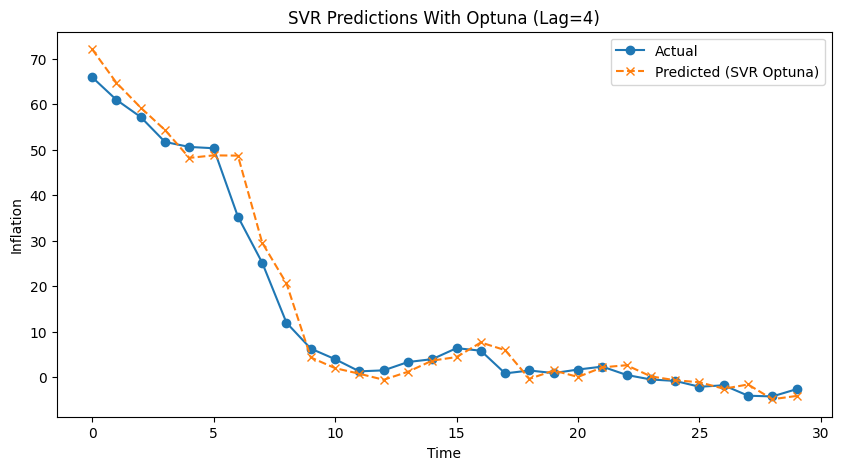

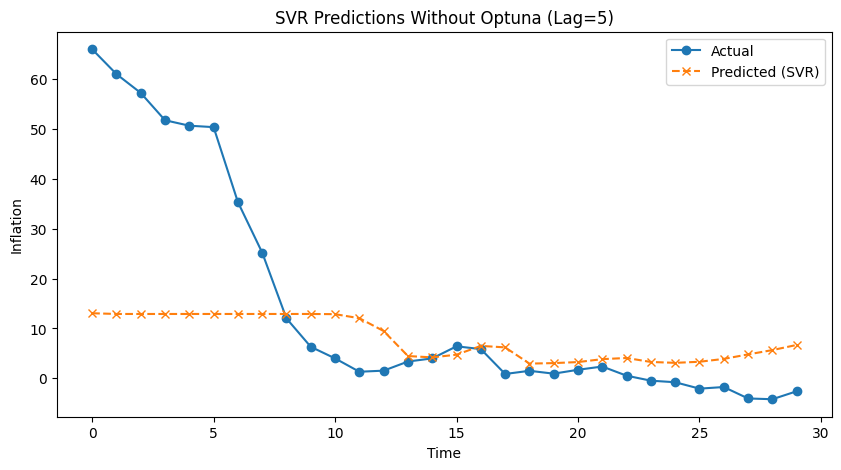

[I 2025-05-30 06:35:43,152] A new study created in memory with name: no-name-f9844d5c-7508-4858-a70f-c92f75b2634f
[I 2025-05-30 06:35:43,378] Trial 0 finished with value: 1.6057714964656924 and parameters: {'C': 3.807947176588889, 'epsilon': 0.951207163345817, 'kernel': 'linear'}. Best is trial 0 with value: 1.6057714964656924.
[I 2025-05-30 06:35:43,421] Trial 1 finished with value: 12.575631759374716 and parameters: {'C': 0.6750277604651747, 'epsilon': 0.8675143843171859, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.6057714964656924.
[I 2025-05-30 06:35:43,460] Trial 2 finished with value: 74.81979303952576 and parameters: {'C': 8.341182143924176, 'epsilon': 0.2202157195714934, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.6057714964656924.
[I 2025-05-30 06:35:43,815] Trial 3 finished with value: 1.6531299548899263 and parameters: {'C': 4.376255684556946, 'epsilon': 0.2983168487960615, 'kernel': 'linear'}. Best is trial 0 with value: 1.6057714964656924.
[I 2025-05-30 06:

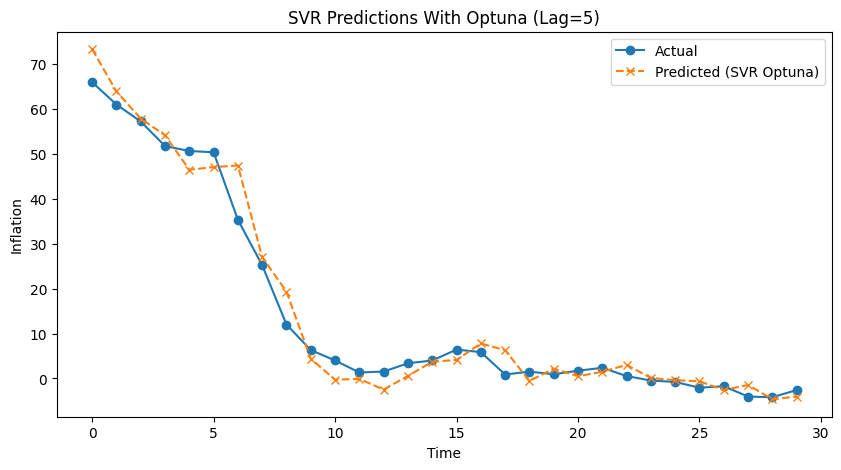

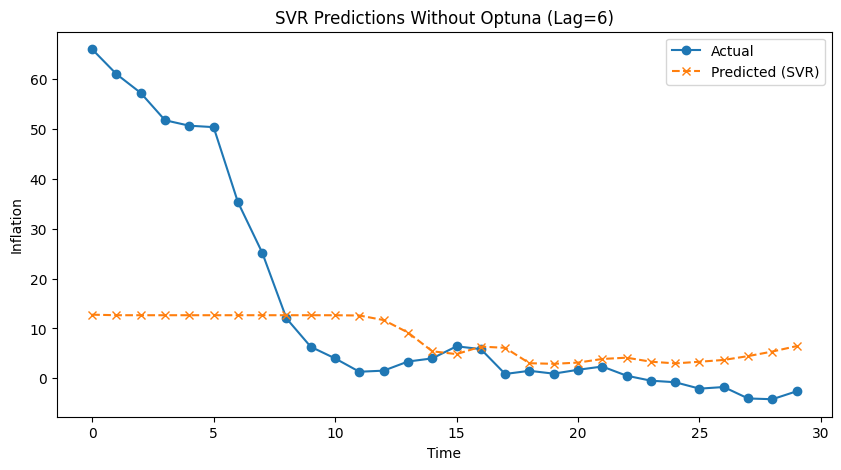

[I 2025-05-30 06:35:51,622] A new study created in memory with name: no-name-31540ff5-8f3e-4a85-ad9a-72927f898637
[I 2025-05-30 06:35:51,869] Trial 0 finished with value: 1.5938264557795627 and parameters: {'C': 3.807947176588889, 'epsilon': 0.951207163345817, 'kernel': 'linear'}. Best is trial 0 with value: 1.5938264557795627.
[I 2025-05-30 06:35:51,910] Trial 1 finished with value: 12.352959488150482 and parameters: {'C': 0.6750277604651747, 'epsilon': 0.8675143843171859, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.5938264557795627.
[I 2025-05-30 06:35:51,966] Trial 2 finished with value: 72.94085724743363 and parameters: {'C': 8.341182143924176, 'epsilon': 0.2202157195714934, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.5938264557795627.
[I 2025-05-30 06:35:52,323] Trial 3 finished with value: 1.6617698629430837 and parameters: {'C': 4.376255684556946, 'epsilon': 0.2983168487960615, 'kernel': 'linear'}. Best is trial 0 with value: 1.5938264557795627.
[I 2025-05-30 06:

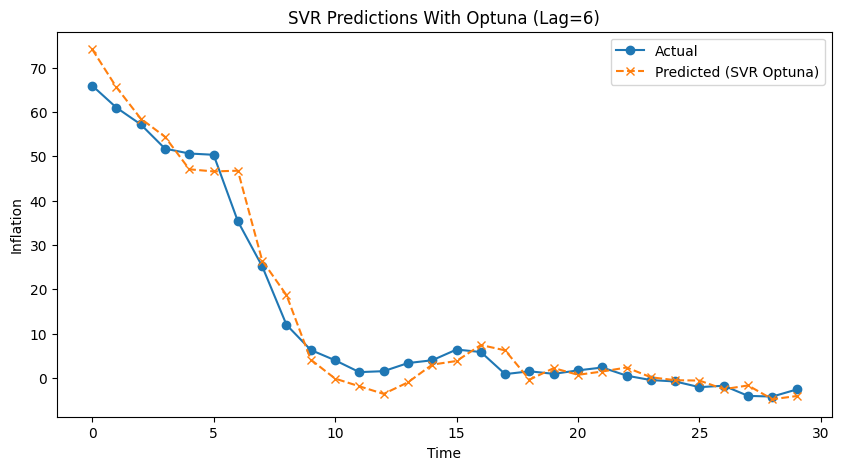

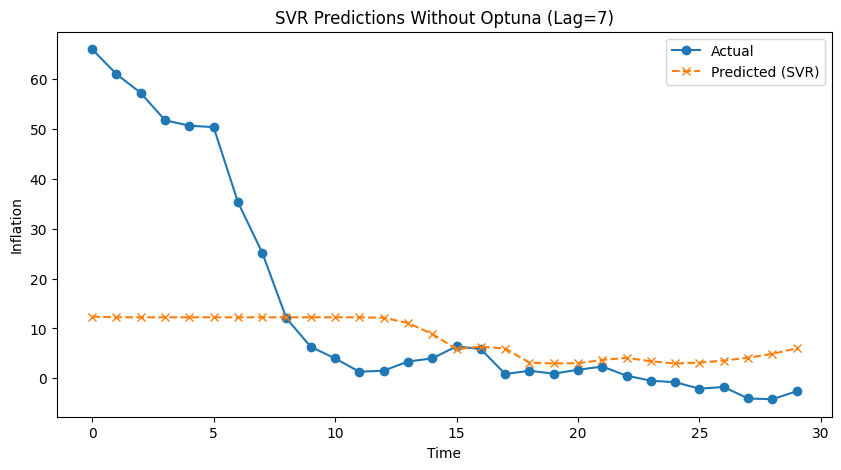

[I 2025-05-30 06:35:58,583] A new study created in memory with name: no-name-e966ff8b-f2ab-489d-8121-8455826ff495
[I 2025-05-30 06:35:58,870] Trial 0 finished with value: 1.5833190138237365 and parameters: {'C': 3.807947176588889, 'epsilon': 0.951207163345817, 'kernel': 'linear'}. Best is trial 0 with value: 1.5833190138237365.
[I 2025-05-30 06:35:58,908] Trial 1 finished with value: 12.222486102658362 and parameters: {'C': 0.6750277604651747, 'epsilon': 0.8675143843171859, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.5833190138237365.
[I 2025-05-30 06:35:58,949] Trial 2 finished with value: 71.57550080244478 and parameters: {'C': 8.341182143924176, 'epsilon': 0.2202157195714934, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.5833190138237365.
[I 2025-05-30 06:35:59,539] Trial 3 finished with value: 1.6628570896298889 and parameters: {'C': 4.376255684556946, 'epsilon': 0.2983168487960615, 'kernel': 'linear'}. Best is trial 0 with value: 1.5833190138237365.
[I 2025-05-30 06:

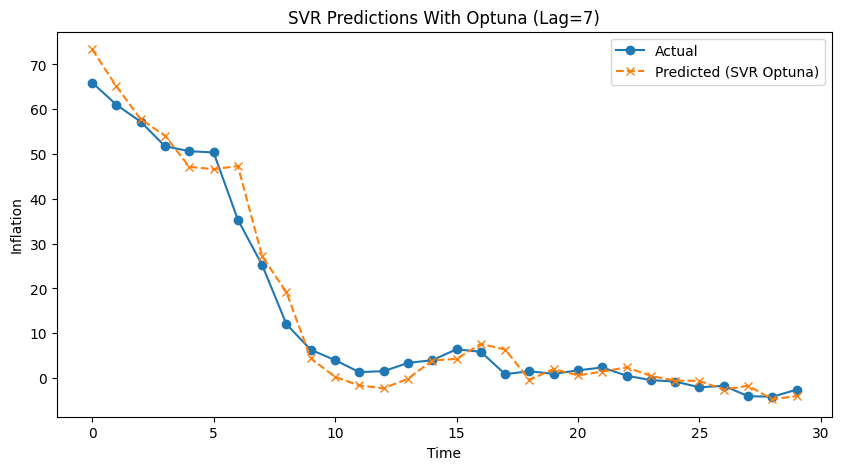

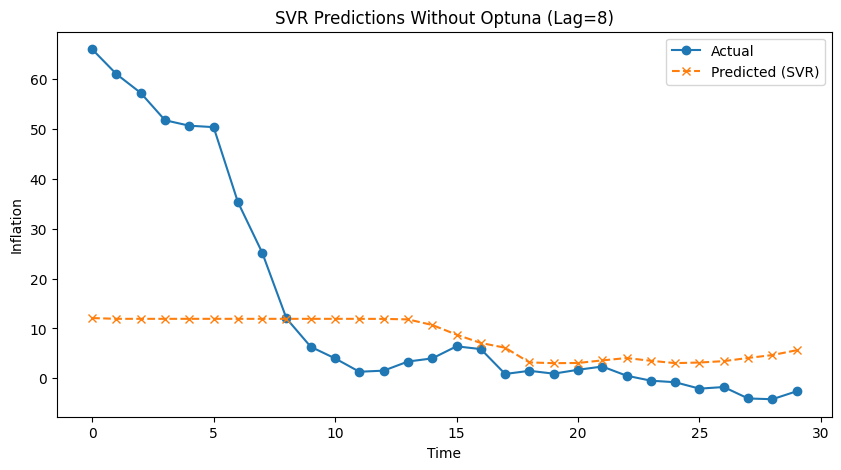

[I 2025-05-30 06:36:07,757] A new study created in memory with name: no-name-860cf89f-9f25-4af8-9bbc-0ef96fcf2819
[I 2025-05-30 06:36:08,258] Trial 0 finished with value: 1.6006397517504556 and parameters: {'C': 3.807947176588889, 'epsilon': 0.951207163345817, 'kernel': 'linear'}. Best is trial 0 with value: 1.6006397517504556.
[I 2025-05-30 06:36:08,301] Trial 1 finished with value: 12.060314393832622 and parameters: {'C': 0.6750277604651747, 'epsilon': 0.8675143843171859, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.6006397517504556.
[I 2025-05-30 06:36:08,346] Trial 2 finished with value: 70.58721643969056 and parameters: {'C': 8.341182143924176, 'epsilon': 0.2202157195714934, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.6006397517504556.
[I 2025-05-30 06:36:08,852] Trial 3 finished with value: 1.654229436597868 and parameters: {'C': 4.376255684556946, 'epsilon': 0.2983168487960615, 'kernel': 'linear'}. Best is trial 0 with value: 1.6006397517504556.
[I 2025-05-30 06:3

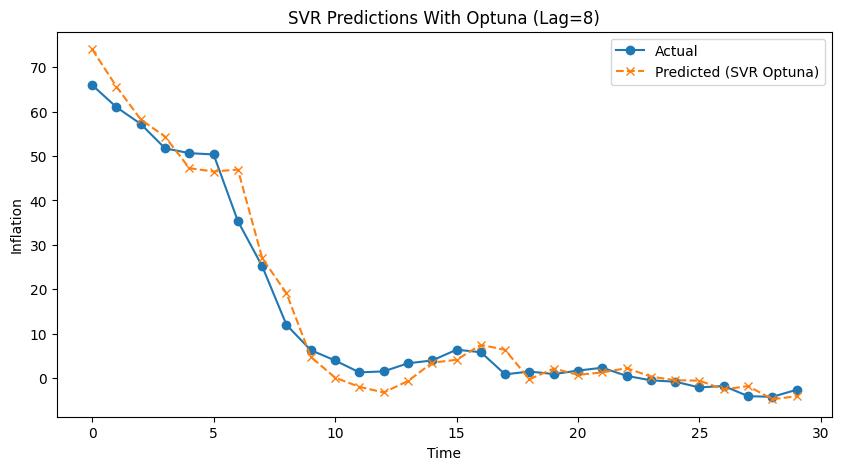

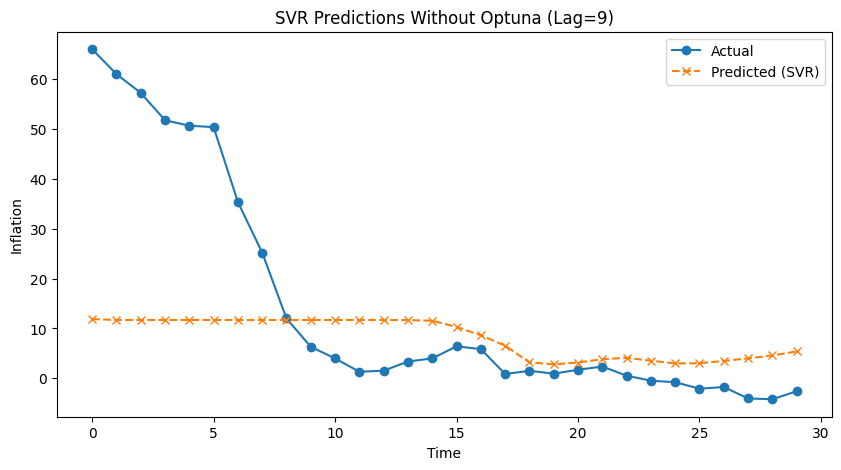

[I 2025-05-30 06:36:17,208] A new study created in memory with name: no-name-992d1067-963a-4b2f-acd0-55bee66f6c01
[I 2025-05-30 06:36:18,129] Trial 0 finished with value: 1.5584972644926318 and parameters: {'C': 3.807947176588889, 'epsilon': 0.951207163345817, 'kernel': 'linear'}. Best is trial 0 with value: 1.5584972644926318.
[I 2025-05-30 06:36:18,188] Trial 1 finished with value: 11.942170895212541 and parameters: {'C': 0.6750277604651747, 'epsilon': 0.8675143843171859, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.5584972644926318.
[I 2025-05-30 06:36:18,229] Trial 2 finished with value: 69.13530394895608 and parameters: {'C': 8.341182143924176, 'epsilon': 0.2202157195714934, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.5584972644926318.
[I 2025-05-30 06:36:19,199] Trial 3 finished with value: 1.6345478131872677 and parameters: {'C': 4.376255684556946, 'epsilon': 0.2983168487960615, 'kernel': 'linear'}. Best is trial 0 with value: 1.5584972644926318.
[I 2025-05-30 06:

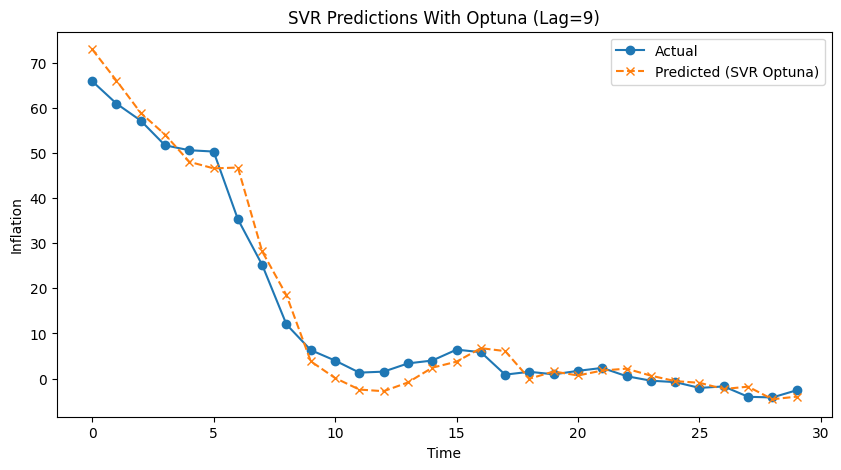

In [14]:
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
import random
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Set global random seed
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)

# Initialize results list
results = []

# Loop through lag terms from 1 to 12
for max_lag in range(1, 10):
    df_lagged = df.copy()

    # Create lag features
    for lag in range(1, max_lag + 1):
        df_lagged[f'Inflation_Lag_{lag}'] = df_lagged['Inflation'].shift(lag)

    # Drop NaN values
    df_lagged = df_lagged.dropna()

    # Split into train and test sets
    train_size = int(0.9 * len(df_lagged))
    train, test = df_lagged[:train_size], df_lagged[train_size:]

    y_train, y_test = train['Inflation'], test['Inflation']
    X_train = train[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]
    X_test = test[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]

    # Train SVR model without Optuna
    svr_model = SVR()
    svr_model.fit(X_train, y_train)
    y_pred = svr_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2_baseline = r2_score(y_test, y_pred)

    results.append([max_lag, 'Without Optuna', rmse, mse, mae, mape, None, None, None, r2_baseline])

    # Plot actual vs. predicted values for the baseline model
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label="Actual", marker='o')
    plt.plot(y_pred, label="Predicted (SVR)", linestyle='dashed', marker='x')
    plt.title(f'SVR Predictions Without Optuna (Lag={max_lag})')
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Inflation")
    plt.show()

    # Define Optuna objective function
    def objective(trial):
        C = trial.suggest_float("C", 0.1, 10.0)
        epsilon = trial.suggest_float("epsilon", 0.01, 1.0)
        kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])

        svr_model = SVR(C=C, epsilon=epsilon, kernel=kernel)

        tscv = TimeSeriesSplit(n_splits=5)
        rmse_scores = []
        for train_idx, val_idx in tscv.split(X_train):
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            svr_model.fit(X_train_fold, y_train_fold)
            y_pred_fold = svr_model.predict(X_val_fold)
            rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold)))

        return np.mean(rmse_scores)

    # Run Optuna optimization with a fixed seed
    sampler = optuna.samplers.TPESampler(seed=random_seed)
    study = optuna.create_study(direction="minimize", sampler=sampler)
    study.optimize(objective, n_trials=20)
    best_params = study.best_params

    # Train best model
    svr_best = SVR(**best_params)
    svr_best.fit(X_train, y_train)
    y_pred_optuna = svr_best.predict(X_test)

    # Evaluate Optuna model
    mse_optuna = mean_squared_error(y_test, y_pred_optuna)
    rmse_optuna = np.sqrt(mse_optuna)
    mae_optuna = mean_absolute_error(y_test, y_pred_optuna)
    mape_optuna = np.mean(np.abs((y_test - y_pred_optuna) / y_test)) * 100
    r2_optuna = r2_score(y_test, y_pred_optuna)

    results.append([
        max_lag, 'With Optuna', rmse_optuna, mse_optuna, mae_optuna, mape_optuna,
        best_params['C'], best_params['epsilon'], best_params['kernel'], r2_optuna
    ])

    # Plot actual vs. predicted values for Optuna-optimized model
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label="Actual", marker='o')
    plt.plot(y_pred_optuna, label="Predicted (SVR Optuna)", linestyle='dashed', marker='x')
    plt.title(f'SVR Predictions With Optuna (Lag={max_lag})')
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Inflation")
    plt.show()

# Save results to CSV
results_df = pd.DataFrame(results, columns=[
    'Lag Terms', 'Model Type', 'Test RMSE', 'Test MSE', 'Test MAE', 'Test MAPE',
    'Best C', 'Best Epsilon', 'Best Kernel', 'R²'
])
results_df.to_csv('SVR_90_10_ModelPerformance.csv', index=False)
